#Imports

In [184]:
import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_palette("Set2")

In [185]:
file_path = "BASE DE DADOS PEDE 2024 - DATATHON.xlsx"
df_2022_raw = pd.read_excel(file_path, sheet_name="PEDE2022")
df_2023_raw = pd.read_excel(file_path, sheet_name="PEDE2023")
df_2024_raw = pd.read_excel(file_path, sheet_name="PEDE2024")

# Tratamento de dados

## Funções Auxiliares

Função para tratar o nome das colunas, transformando em `lowercase`, removendo caracteres especiais e substituindo espaços por `_`.

In [186]:
def clean_columns(df):
  df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .map(lambda x: unicodedata.normalize("NFKD", x)
        .encode("ascii", "ignore")
        .decode("utf-8"))
      .str.replace(r"\s+", "_", regex=True)
      .str.replace(r"[^\w_]", "", regex=True)
  )
  return df

In [187]:
def normalize_fase(value):
  if pd.isna(value):
    return np.nan

  # se já é número
  if isinstance(value, (int, float, np.integer, np.floating)):
    return int(value)

  s = str(value).strip().upper()

  # caso ALFA
  if "ALFA" in s:
    return 0

  # extrai o primeiro número encontrado
  m = re.search(r"(\d+)", s)
  if m:
    return int(m.group(1))

  return np.nan

## 2022

In [188]:
df_2022_raw.head()

,RA,Fase,Turma,Nome,Ano nasc,Idade 22,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,...,Inglês,Indicado,Atingiu PV,IPV,IAN,Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,...,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,...,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


In [189]:
df_2022_raw.describe()

,Fase,Ano nasc,Idade 22,Ano ingresso,INDE 22,Cg,Cf,Ct,Nº Av,IAA,IEG,IPS,IDA,Matem,Portug,Inglês,IPV,IAN,Defas
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,858.000000,858.000000,283.000000,860.000000,860.000000,860.000000
mean,2.098837,2009.861628,12.138372,2020.496512,7.036176,430.516279,75.519767,6.598837,3.054651,8.274419,7.891163,6.905000,6.092907,5.806876,6.320979,5.881272,7.253642,6.424419,-0.943023
std,1.788789,2.771998,2.771998,1.790217,1.017773,248.432761,52.312670,3.975858,0.775371,2.064935,1.638340,1.070707,2.046209,2.414215,2.080364,2.957315,1.093383,2.389609,0.845593
min,0.000000,2001.000000,7.000000,2016.000000,3.032000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,2.500000,-5.000000
25%,1.000000,2008.000000,10.000000,2019.000000,6.485500,215.750000,30.000000,3.000000,2.000000,7.900000,7.000000,6.300000,4.800000,4.300000,5.200000,3.500000,6.722000,5.000000,-1.000000
50%,2.000000,2010.000000,12.000000,2021.000000,7.197000,430.500000,67.000000,6.000000,3.000000,8.800000,8.300000,7.500000,6.300000,6.000000,6.700000,6.300000,7.333000,5.000000,-1.000000
75%,3.000000,2012.000000,14.000000,2022.000000,7.751250,645.250000,118.000000,9.000000,4.000000,9.500000,9.100000,7.500000,7.600000,7.800000,7.800000,8.500000,7.917000,10.000000,0.000000
max,7.000000,2015.000000,21.000000,2022.000000,9.442000,862.000000,192.000000,18.000000,4.000000,10.000000,10.000000,10.000000,9.900000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000


In [190]:
df_2022_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     860 non-null    object 
 1   Fase                   860 non-null    int64  
 2   Turma                  860 non-null    object 
 3   Nome                   860 non-null    object 
 4   Ano nasc               860 non-null    int64  
 5   Idade 22               860 non-null    int64  
 6   Gênero                 860 non-null    object 
 7   Ano ingresso           860 non-null    int64  
 8   Instituição de ensino  860 non-null    object 
 9   Pedra 20               323 non-null    object 
 10  Pedra 21               462 non-null    object 
 11  Pedra 22               860 non-null    object 
 12  INDE 22                860 non-null    float64
 13  Cg                     860 non-null    int64  
 14  Cf                     860 non-null    int64  
 15  Ct    

In [191]:
df_2022 = clean_columns(df_2022_raw)
df_2022.head()

,ra,fase,turma,nome,ano_nasc,idade_22,genero,ano_ingresso,instituicao_de_ensino,pedra_20,...,ingles,indicado,atingiu_pv,ipv,ian,fase_ideal,defas,destaque_ieg,destaque_ida,destaque_ipv
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,...,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,...,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...


A base de dados de 2022 não contém IPP. Porém, como temos presente todos os outros valores e os pesos foram providenciados no documento adicional, podemos calcular o valor do IPP.

In [192]:
def calcula_ipp(row):
    fase = row["fase"]

    pesos = {
        "ian": 0.10,
        "ida": 0.20,
        "ieg": 0.20,
        "iaa": 0.10,
        "ips": 0.10,
        "ipp": 0.10,
        "ipv": 0.20
    }

    # protect against bad rows
    if pd.isna(fase) or fase == 8:
        return np.nan

    if row[["ian","ida","ieg","iaa","ips","ipv","inde_22"]].isna().any():
        return np.nan

    soma = (
        row["ian"] * pesos["ian"]
        + row["ida"] * pesos["ida"]
        + row["ieg"] * pesos["ieg"]
        + row["iaa"] * pesos["iaa"]
        + row["ips"] * pesos["ips"]
        + row["ipv"] * pesos["ipv"]
    )

    ipp = (row["inde_22"] - soma) / pesos["ipp"]

    return float(ipp)

In [193]:
df_2022["ipp"] = df_2022.apply(calcula_ipp, axis=1)
df_2022.head()

,ra,fase,turma,nome,ano_nasc,idade_22,genero,ano_ingresso,instituicao_de_ensino,pedra_20,...,indicado,atingiu_pv,ipv,ian,fase_ideal,defas,destaque_ieg,destaque_ida,destaque_ipv,ipp
0,RA-1,7,A,Aluno-1,2003,19,Menina,2016,Escola Pública,Ametista,...,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.174
1,RA-2,7,A,Aluno-2,2005,17,Menina,2017,Rede Decisão,Ametista,...,Não,Não,6.778,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.894
2,RA-3,7,A,Aluno-3,2005,17,Menina,2016,Rede Decisão,Ametista,...,Não,Não,7.556,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,8.198
3,RA-4,7,A,Aluno-4,2005,17,Menino,2017,Rede Decisão,Ametista,...,Não,Não,5.278,10.0,Fase 7 (3º EM),0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,5.554
4,RA-5,7,A,Aluno-5,2005,17,Menina,2016,Rede Decisão,Ametista,...,Não,Não,7.389,10.0,Fase 7 (3º EM),0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.392


Normalizando os valores da coluna gênero para seguir o padrão das outras bases.

In [194]:
df_2022["genero"] = df_2022["genero"].replace({
    "Menina": "Feminino",
    "Menino": "Masculino"
})

Selecionando as colunas de interesse do DF

In [195]:
#selecionando colunas de interesse
df_2022_clean = df_2022[['nome', 'fase', 'turma', 'ano_nasc', 'idade_22', 'genero', 'ano_ingresso', 'instituicao_de_ensino', 'pedra_22', 'inde_22', 'no_av', 'iaa', 'ieg', 'ips', 'ida', 'ipv', 'ian', 'ipp', 'fase_ideal', 'defas']]
df_2022_clean.head()

,nome,fase,turma,ano_nasc,idade_22,genero,ano_ingresso,instituicao_de_ensino,pedra_22,inde_22,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
0,Aluno-1,7,A,2003,19,Feminino,2016,Escola Pública,Quartzo,5.783,4,8.3,4.1,5.6,4.0,7.278,5.0,8.174,Fase 8 (Universitários),-1
1,Aluno-2,7,A,2005,17,Feminino,2017,Rede Decisão,Ametista,7.055,4,8.8,5.2,6.3,6.8,6.778,10.0,7.894,Fase 7 (3º EM),0
2,Aluno-3,7,A,2005,17,Feminino,2016,Rede Decisão,Ágata,6.591,4,0.0,7.9,5.6,5.6,7.556,10.0,8.198,Fase 7 (3º EM),0
3,Aluno-4,7,A,2005,17,Masculino,2017,Rede Decisão,Quartzo,5.951,4,8.8,4.5,5.6,5.0,5.278,10.0,5.554,Fase 7 (3º EM),0
4,Aluno-5,7,A,2005,17,Feminino,2016,Rede Decisão,Ametista,7.427,4,7.9,8.6,5.6,5.2,7.389,10.0,8.392,Fase 7 (3º EM),0


In [196]:
df_2022_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome                   860 non-null    object 
 1   fase                   860 non-null    int64  
 2   turma                  860 non-null    object 
 3   ano_nasc               860 non-null    int64  
 4   idade_22               860 non-null    int64  
 5   genero                 860 non-null    object 
 6   ano_ingresso           860 non-null    int64  
 7   instituicao_de_ensino  860 non-null    object 
 8   pedra_22               860 non-null    object 
 9   inde_22                860 non-null    float64
 10  no_av                  860 non-null    int64  
 11  iaa                    860 non-null    float64
 12  ieg                    860 non-null    float64
 13  ips                    860 non-null    float64
 14  ida                    860 non-null    float64
 15  ipv   

## 2023

In [197]:
df_2023_raw.head()

,RA,Fase,INDE 2023,Pedra 2023,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,Indicado,Atingiu PV,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
0,RA-1,FASE 8,NaN,NaN,8E,Aluno-1,2003-03-10 00:00:00,1900-01-20 00:00:00,Feminino,2016,...,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,NaN
1,RA-1000,ALFA,7.9162,Ametista,ALFA U - G2/G3,Aluno-1000,4/20/2015,8,Feminino,2023,...,NaN,NaN,8.92,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
2,RA-1001,ALFA,8.1162,Topázio,ALFA U - G2/G3,Aluno-1001,3/13/2014,9,Feminino,2023,...,NaN,NaN,9.17,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
3,RA-1002,ALFA,7.9012,Ametista,ALFA U - G2/G3,Aluno-1002,7/13/2014,9,Feminino,2023,...,NaN,NaN,8.92,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
4,RA-1003,ALFA,7.6522,Ametista,ALFA V - G0/G1,Aluno-1003,1/22/2015,8,Masculino,2023,...,NaN,NaN,8.75,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


In [198]:
df_2023_raw.describe()

,INDE 2023,Ano ingresso,Pedra 23,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,...,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Destaque IPV.1
count,931.000000,1014.000000,0.0,600.000000,0.0,0.0,0.0,0.0,938.000000,0.0,...,334.000000,0.0,0.0,938.000000,1014.000000,1014.000000,0.0,0.0,0.0,0.0
mean,7.342309,2021.378698,NaN,7.262788,NaN,NaN,NaN,NaN,3.109808,NaN,...,6.200299,NaN,NaN,8.027897,7.243590,-0.654832,NaN,NaN,NaN,NaN
std,0.901757,1.873750,NaN,0.895774,NaN,NaN,NaN,NaN,0.768712,NaN,...,2.236545,NaN,NaN,0.945427,2.539585,0.821233,NaN,NaN,NaN,NaN
min,3.745542,2016.000000,NaN,3.700000,NaN,NaN,NaN,NaN,2.000000,NaN,...,0.000000,NaN,NaN,3.320000,2.500000,-4.000000,NaN,NaN,NaN,NaN
25%,6.724150,2021.000000,NaN,6.740250,NaN,NaN,NaN,NaN,3.000000,NaN,...,4.725000,NaN,NaN,7.462500,5.000000,-1.000000,NaN,NaN,NaN,NaN
50%,7.408033,2022.000000,NaN,7.402500,NaN,NaN,NaN,NaN,3.000000,NaN,...,6.400000,NaN,NaN,8.045000,5.000000,-1.000000,NaN,NaN,NaN,NaN
75%,7.996083,2023.000000,NaN,7.903500,NaN,NaN,NaN,NaN,4.000000,NaN,...,7.800000,NaN,NaN,8.668750,10.000000,0.000000,NaN,NaN,NaN,NaN
max,9.371200,2023.000000,NaN,9.442000,NaN,NaN,NaN,NaN,4.000000,NaN,...,10.000000,NaN,NaN,10.010000,10.000000,2.000000,NaN,NaN,NaN,NaN


In [199]:
df_2023_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RA                     1014 non-null   object 
 1   Fase                   1014 non-null   object 
 2   INDE 2023              931 non-null    float64
 3   Pedra 2023             931 non-null    object 
 4   Turma                  1014 non-null   object 
 5   Nome Anonimizado       1014 non-null   object 
 6   Data de Nasc           1014 non-null   object 
 7   Idade                  1014 non-null   object 
 8   Gênero                 1014 non-null   object 
 9   Ano ingresso           1014 non-null   int64  
 10  Instituição de ensino  1014 non-null   object 
 11  Pedra 20               240 non-null    object 
 12  Pedra 21               335 non-null    object 
 13  Pedra 22               600 non-null    object 
 14  Pedra 23               0 non-null      float64
 15  INDE

In [200]:
df_2023 = clean_columns(df_2023_raw)
df_2023.head()

,ra,fase,inde_2023,pedra_2023,turma,nome_anonimizado,data_de_nasc,idade,genero,ano_ingresso,...,indicado,atingiu_pv,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,destaque_ipv1
0,RA-1,FASE 8,NaN,NaN,8E,Aluno-1,2003-03-10 00:00:00,1900-01-20 00:00:00,Feminino,2016,...,NaN,NaN,NaN,10.0,Fase 8 (Universitários),0,NaN,NaN,NaN,NaN
1,RA-1000,ALFA,7.9162,Ametista,ALFA U - G2/G3,Aluno-1000,4/20/2015,8,Feminino,2023,...,NaN,NaN,8.92,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN
2,RA-1001,ALFA,8.1162,Topázio,ALFA U - G2/G3,Aluno-1001,3/13/2014,9,Feminino,2023,...,NaN,NaN,9.17,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
3,RA-1002,ALFA,7.9012,Ametista,ALFA U - G2/G3,Aluno-1002,7/13/2014,9,Feminino,2023,...,NaN,NaN,8.92,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,NaN
4,RA-1003,ALFA,7.6522,Ametista,ALFA V - G0/G1,Aluno-1003,1/22/2015,8,Masculino,2023,...,NaN,NaN,8.75,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,NaN


Padronizando o DF com base no de 2022

Limpeza da coluna `fase`

In [201]:
df_2023["fase"] = df_2023["fase"].str.replace(r"FASE", "", regex=True)

In [202]:
df_2023["fase"] = df_2023["fase"].apply(normalize_fase).astype("Int64")


Limpeza da coluna `turma`

In [203]:
df_2023["turma"] = (
    df_2023["turma"]
    .str.replace(r"^(?:\d+|ALFA)\s*", "", regex=True)
    .str.strip()
)

Cálculo da data de nascimento e da idade

In [204]:
df_2023["data_de_nasc"] = pd.to_datetime(df_2023["data_de_nasc"], errors="coerce").dt.year.astype("Int64")

In [205]:
df_2023['idade'] = 2023 - df_2023['data_de_nasc']

Padronização do nome das colunas

In [206]:
df_2023 = df_2023.rename(columns={
    "nome_anonimizado": "nome",
    "data_de_nasc": "ano_nasc",
    "idade": "idade_23",
    "genero_anonimizado": "genero",
    "ano_de_ingresso": "ano_ingresso",
    "defasagem": "defas"
})

In [207]:
df_2023["no_av"] = pd.to_numeric(df_2023["no_av"], errors="coerce").astype("Int64")

Selecionando colunas de interesse

In [208]:
df_2023 = df_2023[['nome', 'fase', 'turma', 'ano_nasc', 'idade_23', 'genero', 'ano_ingresso', 'instituicao_de_ensino', 'pedra_2023', 'inde_2023', 'no_av', 'iaa', 'ieg', 'ips', 'ida', 'ipv', 'ian', 'ipp', 'fase_ideal', 'defas']]
df_2023.head()

,nome,fase,turma,ano_nasc,idade_23,genero,ano_ingresso,instituicao_de_ensino,pedra_2023,inde_2023,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
0,Aluno-1,8,E,2003,20,Feminino,2016,Privada *Parcerias com Bolsa 100%,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,10.0,NaN,Fase 8 (Universitários),0
1,Aluno-1000,0,U - G2/G3,2015,8,Feminino,2023,Pública,Ametista,7.9162,2,8.5,9.4,3.77,7.0,8.92,10.0,6.25,ALFA (1° e 2° ano),0
2,Aluno-1001,0,U - G2/G3,2014,9,Feminino,2023,Pública,Topázio,8.1162,2,9.0,9.1,7.52,7.8,9.17,5.0,7.50,Fase 1 (3° e 4° ano),-1
3,Aluno-1002,0,U - G2/G3,2014,9,Feminino,2023,Pública,Ametista,7.9012,2,9.0,9.7,7.52,7.0,8.92,5.0,6.25,Fase 1 (3° e 4° ano),-1
4,Aluno-1003,0,V - G0/G1,2015,8,Masculino,2023,Pública,Ametista,7.6522,2,9.0,8.5,7.52,4.0,8.75,10.0,7.50,ALFA (1° e 2° ano),0


Removendo dados nulos

In [209]:
df_2023_clean = df_2023.dropna()
df_2023_clean.head()

,nome,fase,turma,ano_nasc,idade_23,genero,ano_ingresso,instituicao_de_ensino,pedra_2023,inde_2023,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
1,Aluno-1000,0,U - G2/G3,2015,8,Feminino,2023,Pública,Ametista,7.9162,2,8.5,9.4,3.77,7.0,8.92,10.0,6.250,ALFA (1° e 2° ano),0
2,Aluno-1001,0,U - G2/G3,2014,9,Feminino,2023,Pública,Topázio,8.1162,2,9.0,9.1,7.52,7.8,9.17,5.0,7.500,Fase 1 (3° e 4° ano),-1
3,Aluno-1002,0,U - G2/G3,2014,9,Feminino,2023,Pública,Ametista,7.9012,2,9.0,9.7,7.52,7.0,8.92,5.0,6.250,Fase 1 (3° e 4° ano),-1
4,Aluno-1003,0,V - G0/G1,2015,8,Masculino,2023,Pública,Ametista,7.6522,2,9.0,8.5,7.52,4.0,8.75,10.0,7.500,ALFA (1° e 2° ano),0
5,Aluno-1004,0,V - G0/G1,2014,9,Feminino,2023,Pública,Topázio,8.3137,2,9.0,9.6,7.52,7.9,7.42,10.0,6.875,ALFA (1° e 2° ano),0


In [210]:
df_2023_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931 entries, 1 to 1013
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome                   931 non-null    object 
 1   fase                   931 non-null    Int64  
 2   turma                  931 non-null    object 
 3   ano_nasc               931 non-null    Int64  
 4   idade_23               931 non-null    Int64  
 5   genero                 931 non-null    object 
 6   ano_ingresso           931 non-null    int64  
 7   instituicao_de_ensino  931 non-null    object 
 8   pedra_2023             931 non-null    object 
 9   inde_2023              931 non-null    float64
 10  no_av                  931 non-null    Int64  
 11  iaa                    931 non-null    float64
 12  ieg                    931 non-null    float64
 13  ips                    931 non-null    float64
 14  ida                    931 non-null    float64
 15  ipv       

## 2024

In [211]:
df_2024_raw.head()

,RA,Fase,INDE 2024,Pedra 2024,Turma,Nome Anonimizado,Data de Nasc,Idade,Gênero,Ano ingresso,...,IPV,IAN,Fase Ideal,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,7.9522,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16,8,Masculino,2024,...,7.046667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,7.156367,Ametista,ALFA A - G0/G1,Aluno-868,2015-11-08,8,Masculino,2023,...,7.213333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,5.4442,Quartzo,ALFA A - G0/G1,Aluno-1278,2015-03-22,9,Masculino,2024,...,4.173333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando


In [212]:
df_2024_raw.describe()

,Data de Nasc,Idade,Ano ingresso,INDE 22,INDE 23,Cg,Cf,Ct,Nº Av,Rec Av1,...,Por,Ing,Indicado,Atingiu PV,IPV,IAN,Defasagem,Destaque IEG,Destaque IDA,Destaque IPV
count,1156,1156.000000,1156.000000,472.000000,690.000000,0.0,0.0,0.0,1156.000000,0.0,...,1050.000000,474.000000,0.0,0.0,1054.000000,1156.000000,1156.000000,0.0,0.0,0.0
mean,2011-05-10 06:46:14.740484352,12.987889,2022.519896,7.368276,7.455472,NaN,NaN,NaN,2.951557,NaN,...,6.175762,6.595886,NaN,NaN,7.354268,7.683824,-0.409170,NaN,NaN,NaN
min,1996-12-08 02:00:00,7.000000,2021.000000,3.031806,4.406458,NaN,NaN,NaN,0.000000,NaN,...,0.000000,0.000000,NaN,NaN,2.943333,2.500000,-3.000000,NaN,NaN,NaN
25%,2009-02-28 18:00:00,10.000000,2021.000000,6.890881,6.862402,NaN,NaN,NaN,2.000000,NaN,...,5.000000,5.000000,NaN,NaN,6.790625,5.000000,-1.000000,NaN,NaN,NaN
50%,2012-01-07 00:00:00,12.000000,2023.000000,7.475431,7.559046,NaN,NaN,NaN,3.000000,NaN,...,6.500000,7.000000,NaN,NaN,7.500000,10.000000,0.000000,NaN,NaN,NaN
75%,2014-02-06 06:00:00,15.000000,2024.000000,7.981160,8.048758,NaN,NaN,NaN,4.000000,NaN,...,8.000000,9.000000,NaN,NaN,8.085000,10.000000,0.000000,NaN,NaN,NaN
max,2017-06-02 00:00:00,27.000000,2024.000000,9.441522,9.371200,NaN,NaN,NaN,6.000000,NaN,...,10.000000,10.000000,NaN,NaN,9.760000,10.000000,3.000000,NaN,NaN,NaN
std,NaN,3.584699,1.204804,0.861821,0.850390,NaN,NaN,NaN,1.397985,NaN,...,2.379552,2.876249,NaN,NaN,1.048541,2.504055,0.850497,NaN,NaN,NaN


In [213]:
df_2024_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RA                     1156 non-null   object        
 1   Fase                   1156 non-null   object        
 2   INDE 2024              1092 non-null   object        
 3   Pedra 2024             1092 non-null   object        
 4   Turma                  1156 non-null   object        
 5   Nome Anonimizado       1156 non-null   object        
 6   Data de Nasc           1156 non-null   datetime64[ns]
 7   Idade                  1156 non-null   int64         
 8   Gênero                 1156 non-null   object        
 9   Ano ingresso           1156 non-null   int64         
 10  Instituição de ensino  1155 non-null   object        
 11  Pedra 20               191 non-null    object        
 12  Pedra 21               264 non-null    object        
 13  Ped

In [214]:
df_2024 = clean_columns(df_2024_raw)
df_2024.head()

,ra,fase,inde_2024,pedra_2024,turma,nome_anonimizado,data_de_nasc,idade,genero,ano_ingresso,...,ipv,ian,fase_ideal,defasagem,destaque_ieg,destaque_ida,destaque_ipv,escola,ativo_inativo,ativo_inativo1
0,RA-1275,ALFA,7.611367,Ametista,ALFA A - G0/G1,Aluno-1275,2016-07-28,8,Masculino,2024,...,5.446667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
1,RA-1276,ALFA,8.002867,Topázio,ALFA A - G0/G1,Aluno-1276,2016-10-16,8,Feminino,2024,...,7.050000,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
2,RA-1277,ALFA,7.9522,Ametista,ALFA A - G0/G1,Aluno-1277,2016-08-16,8,Masculino,2024,...,7.046667,10.0,ALFA (1° e 2° ano),0,NaN,NaN,NaN,EE Dom Pedro Villas Boas de Souza,Cursando,Cursando
3,RA-868,ALFA,7.156367,Ametista,ALFA A - G0/G1,Aluno-868,2015-11-08,8,Masculino,2023,...,7.213333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EE Chácara Florida II,Cursando,Cursando
4,RA-1278,ALFA,5.4442,Quartzo,ALFA A - G0/G1,Aluno-1278,2015-03-22,9,Masculino,2024,...,4.173333,5.0,Fase 1 (3° e 4° ano),-1,NaN,NaN,NaN,EM Etelvina Delfim Simões,Cursando,Cursando


Tratamento da coluna `fase`, de acordo com a base de 2022.

In [215]:
df_2024["fase"] = df_2024["fase"].str.replace(r"FASE", "", regex=True)

In [216]:
df_2024["fase"] = df_2024["fase"].apply(normalize_fase).astype("Int64")

Tratamento da coluna `turma`

In [217]:
df_2024["turma"] = (
    df_2024["turma"]
    .str.replace(r"^(?:\d+|ALFA)\s*", "", regex=True)
    .str.strip()
)

Cálculo da data de nascimento

In [218]:
df_2024["data_de_nasc"] = pd.to_datetime(df_2024["data_de_nasc"], errors="coerce").dt.year.astype("Int64")

Padronização do nome das collunas.

In [219]:
df_2024 = df_2024.rename(columns={
    "nome_anonimizado": "nome",
    "data_de_nasc": "ano_nasc",
    "idade": "idade_24",
    "genero_anonimizado": "genero",
    "ano_de_ingresso": "ano_ingresso",
    "defasagem": "defas"
})

Selecionando colunas de interesse

In [220]:
df_2024 = df_2024[['nome', 'fase', 'turma', 'ano_nasc', 'idade_24', 'genero', 'ano_ingresso', 'instituicao_de_ensino', 'pedra_2024', 'inde_2024', 'no_av', 'iaa', 'ieg', 'ips', 'ida', 'ipv', 'ian', 'ipp', 'fase_ideal', 'defas']]
df_2024.head()

,nome,fase,turma,ano_nasc,idade_24,genero,ano_ingresso,instituicao_de_ensino,pedra_2024,inde_2024,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
0,Aluno-1275,0,A - G0/G1,2016,8,Masculino,2024,Pública,Ametista,7.611367,3,10.002,8.666667,6.26,8.0,5.446667,10.0,5.625,ALFA (1° e 2° ano),0
1,Aluno-1276,0,A - G0/G1,2016,8,Feminino,2024,Pública,Topázio,8.002867,3,10.002,9.333333,3.76,8.0,7.050000,10.0,7.500,ALFA (1° e 2° ano),0
2,Aluno-1277,0,A - G0/G1,2016,8,Masculino,2024,Pública,Ametista,7.9522,3,10.002,9.083333,3.76,8.0,7.046667,10.0,7.500,ALFA (1° e 2° ano),0
3,Aluno-868,0,A - G0/G1,2015,8,Masculino,2023,Pública,Ametista,7.156367,3,8.002,9.750000,3.76,7.0,7.213333,5.0,6.875,Fase 1 (3° e 4° ano),-1
4,Aluno-1278,0,A - G0/G1,2015,9,Masculino,2024,Pública,Quartzo,5.4442,3,9.002,4.166667,3.76,7.5,4.173333,5.0,5.000,Fase 1 (3° e 4° ano),-1


In [221]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome                   1156 non-null   object 
 1   fase                   1118 non-null   Int64  
 2   turma                  1118 non-null   object 
 3   ano_nasc               1156 non-null   Int64  
 4   idade_24               1156 non-null   int64  
 5   genero                 1156 non-null   object 
 6   ano_ingresso           1156 non-null   int64  
 7   instituicao_de_ensino  1155 non-null   object 
 8   pedra_2024             1092 non-null   object 
 9   inde_2024              1092 non-null   object 
 10  no_av                  1156 non-null   int64  
 11  iaa                    1054 non-null   float64
 12  ieg                    1156 non-null   float64
 13  ips                    1054 non-null   float64
 14  ida                    1055 non-null   float64
 15  ipv 

Removendo dados nulos do DF

In [222]:
df_2024_clean = df_2024.dropna()
df_2024_clean.head()

,nome,fase,turma,ano_nasc,idade_24,genero,ano_ingresso,instituicao_de_ensino,pedra_2024,inde_2024,no_av,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas
0,Aluno-1275,0,A - G0/G1,2016,8,Masculino,2024,Pública,Ametista,7.611367,3,10.002,8.666667,6.26,8.0,5.446667,10.0,5.625,ALFA (1° e 2° ano),0
1,Aluno-1276,0,A - G0/G1,2016,8,Feminino,2024,Pública,Topázio,8.002867,3,10.002,9.333333,3.76,8.0,7.050000,10.0,7.500,ALFA (1° e 2° ano),0
2,Aluno-1277,0,A - G0/G1,2016,8,Masculino,2024,Pública,Ametista,7.9522,3,10.002,9.083333,3.76,8.0,7.046667,10.0,7.500,ALFA (1° e 2° ano),0
3,Aluno-868,0,A - G0/G1,2015,8,Masculino,2023,Pública,Ametista,7.156367,3,8.002,9.750000,3.76,7.0,7.213333,5.0,6.875,Fase 1 (3° e 4° ano),-1
4,Aluno-1278,0,A - G0/G1,2015,9,Masculino,2024,Pública,Quartzo,5.4442,3,9.002,4.166667,3.76,7.5,4.173333,5.0,5.000,Fase 1 (3° e 4° ano),-1


In [223]:
df_2024_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1053 entries, 0 to 1053
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nome                   1053 non-null   object 
 1   fase                   1053 non-null   Int64  
 2   turma                  1053 non-null   object 
 3   ano_nasc               1053 non-null   Int64  
 4   idade_24               1053 non-null   int64  
 5   genero                 1053 non-null   object 
 6   ano_ingresso           1053 non-null   int64  
 7   instituicao_de_ensino  1053 non-null   object 
 8   pedra_2024             1053 non-null   object 
 9   inde_2024              1053 non-null   object 
 10  no_av                  1053 non-null   int64  
 11  iaa                    1053 non-null   float64
 12  ieg                    1053 non-null   float64
 13  ips                    1053 non-null   float64
 14  ida                    1053 non-null   float64
 15  ipv      

## Agrupamento dos DFs

In [224]:
df_2022_clean = df_2022_clean.rename(columns={
    'idade_22': 'idade',
    'pedra_22': 'pedra',
    'inde_22': 'inde'
})
df_2022_clean['ano'] = 2022

df_2023_clean = df_2023_clean.rename(columns={
    'idade_23': 'idade',
    'pedra_2023': 'pedra',
    'inde_2023': 'inde'
})
df_2023_clean['ano'] = 2023

df_2024_clean = df_2024_clean.rename(columns={
    'idade_24': 'idade',
    'pedra_2024': 'pedra',
    'inde_2024': 'inde'
})
df_2024_clean['ano'] = 2024

df_combined = pd.concat([df_2022_clean, df_2023_clean, df_2024_clean], ignore_index=True)

df_combined['inde'] = pd.to_numeric(df_combined['inde'], errors='coerce')
df_combined['fase'] = df_combined['fase'].astype(str)

df_combined.head()

,nome,fase,turma,ano_nasc,idade,genero,ano_ingresso,instituicao_de_ensino,pedra,inde,...,iaa,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas,ano
0,Aluno-1,7,A,2003,19,Feminino,2016,Escola Pública,Quartzo,5.783,...,8.3,4.1,5.6,4.0,7.278,5.0,8.174,Fase 8 (Universitários),-1,2022
1,Aluno-2,7,A,2005,17,Feminino,2017,Rede Decisão,Ametista,7.055,...,8.8,5.2,6.3,6.8,6.778,10.0,7.894,Fase 7 (3º EM),0,2022
2,Aluno-3,7,A,2005,17,Feminino,2016,Rede Decisão,Ágata,6.591,...,0.0,7.9,5.6,5.6,7.556,10.0,8.198,Fase 7 (3º EM),0,2022
3,Aluno-4,7,A,2005,17,Masculino,2017,Rede Decisão,Quartzo,5.951,...,8.8,4.5,5.6,5.0,5.278,10.0,5.554,Fase 7 (3º EM),0,2022
4,Aluno-5,7,A,2005,17,Feminino,2016,Rede Decisão,Ametista,7.427,...,7.9,8.6,5.6,5.2,7.389,10.0,8.392,Fase 7 (3º EM),0,2022


# Análise dos questionamentos

## 1. Adequação do nível (IAN): Qual é o perfil geral de defasagem dos alunos (IAN) e como ele evolui ao longo do tempo?

Cálculo da faixa do IAN

In [308]:
df_combined['fase'].unique()

array(['7', '6', '5', '4', '3', '2', '1', '0'], dtype=object)

In [309]:
def calculo_faixa_ian(ian):
  if pd.isna(ian):
    return "Não informado"
  elif ian == 2.5:
    return "Insuficiente"
  elif ian == 5:
    return "Básico"
  elif ian == 10:
    return "Adequado"

In [310]:
df_combined['ian_faixa'] = df_combined['ian'].apply(calculo_faixa_ian)
df_combined.head()

,nome,fase,turma,ano_nasc,idade,genero,ano_ingresso,instituicao_de_ensino,pedra,inde,...,ieg,ips,ida,ipv,ian,ipp,fase_ideal,defas,ano,ian_faixa
0,Aluno-1,7,A,2003,19,Feminino,2016,Escola Pública,Quartzo,5.783,...,4.1,5.6,4.0,7.278,5.0,8.174,Fase 8 (Universitários),-1,2022,Básico
1,Aluno-2,7,A,2005,17,Feminino,2017,Rede Decisão,Ametista,7.055,...,5.2,6.3,6.8,6.778,10.0,7.894,Fase 7 (3º EM),0,2022,Adequado
2,Aluno-3,7,A,2005,17,Feminino,2016,Rede Decisão,Ágata,6.591,...,7.9,5.6,5.6,7.556,10.0,8.198,Fase 7 (3º EM),0,2022,Adequado
3,Aluno-4,7,A,2005,17,Masculino,2017,Rede Decisão,Quartzo,5.951,...,4.5,5.6,5.0,5.278,10.0,5.554,Fase 7 (3º EM),0,2022,Adequado
4,Aluno-5,7,A,2005,17,Feminino,2016,Rede Decisão,Ametista,7.427,...,8.6,5.6,5.2,7.389,10.0,8.392,Fase 7 (3º EM),0,2022,Adequado


Perfil da defasagem IAN por ano

In [311]:
perfil_ian = (
  df_combined.dropna(subset=["ian_faixa"])
    .groupby(["ano", "ian_faixa"])
    .size()
    .reset_index(name="qtd")
)

perfil_ian["pct"] = (
  perfil_ian.groupby("ano")["qtd"]
    .transform(lambda x: (x / x.sum() * 100).round(2))
)

perfil_ian

,ano,ian_faixa,qtd,pct
0,2022,Adequado,259,30.12
1,2022,Básico,573,66.63
2,2022,Insuficiente,28,3.26
3,2023,Adequado,387,41.57
4,2023,Básico,531,57.04
5,2023,Insuficiente,13,1.40
6,2024,Adequado,519,49.29
7,2024,Básico,531,50.43
8,2024,Insuficiente,3,0.28


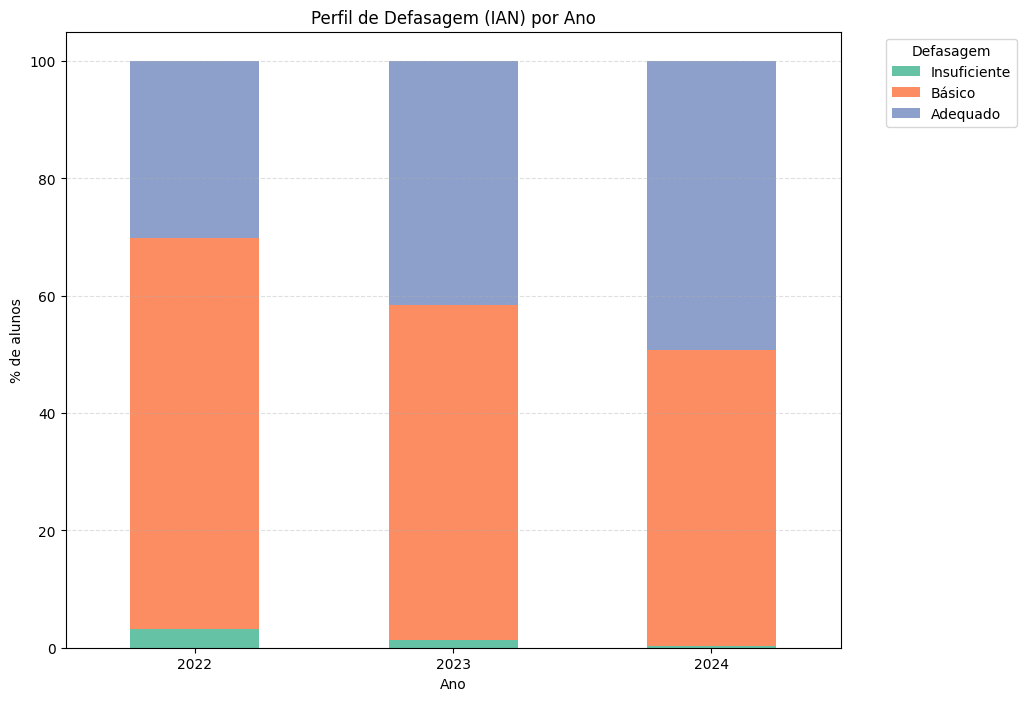

In [312]:
pivot_df = perfil_ian.pivot(index='ano', columns='ian_faixa', values='pct')
pivot_df = pivot_df[['Insuficiente', 'Básico', 'Adequado']]

pivot_df.plot(
  kind="bar", stacked=True, figsize=(10,8)
)

plt.title("Perfil de Defasagem (IAN) por Ano")
plt.ylabel("% de alunos")
plt.xlabel("Ano")
plt.xticks(rotation=360)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend(title="Defasagem", bbox_to_anchor=(1.05,1))
plt.show()

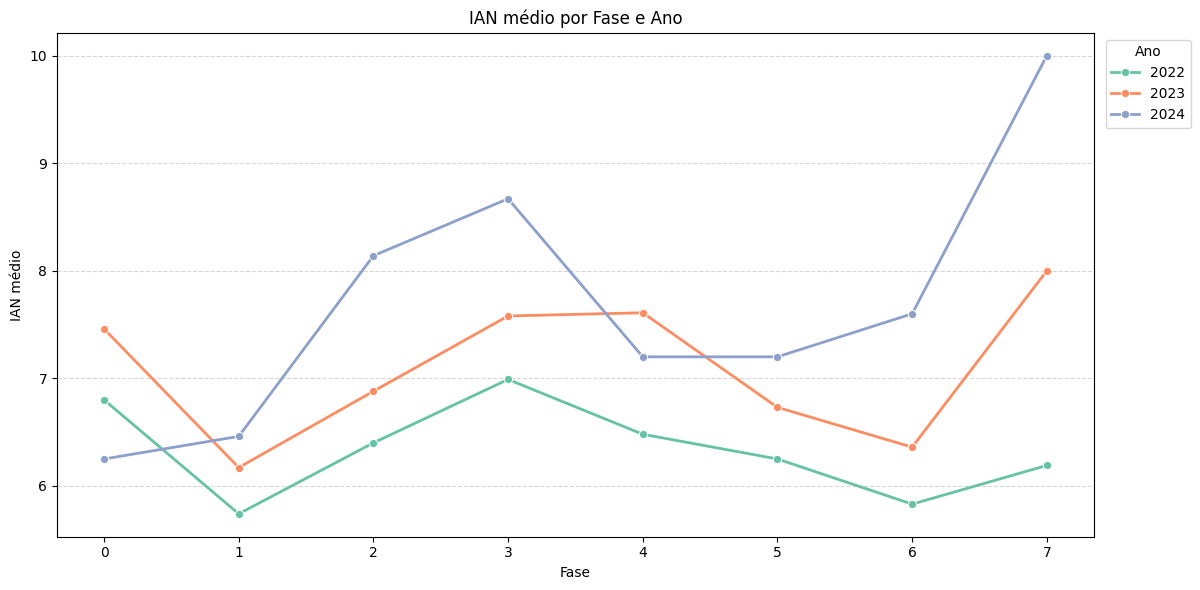

In [313]:
ian_group = (
  df_combined.groupby(['ano', 'fase'], as_index=False)['ian']
    .mean()
    .round(2)
    .rename(columns={'ian':'ian_medio'})
)
ian_group['ano'] = ian_group['ano'].astype(str)

plt.figure(figsize=(12, 6))

sns.lineplot(data=ian_group, x='fase', y='ian_medio', hue='ano', marker='o', linewidth=2, markers='o')

plt.title('IAN médio por Fase e Ano')
plt.xlabel('Fase')
plt.ylabel('IAN médio')
plt.legend(title='Ano', bbox_to_anchor=(1.1, 1), loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2. Desempenho acadêmico (IDA): O desempenho acadêmico médio (IDA) está melhorando, estagnado ou caindo ao longo das fases e anos?

Análise do IDA por ano

In [314]:
ida_ano = (
  df_combined
    .groupby("ano", as_index=False)["ida"]
    .mean()
    .round(2)
    .rename(columns={"ida":"ida_medio"})
)

ida_ano

,ano,ida_medio
0,2022,6.09
1,2023,6.67
2,2024,6.35


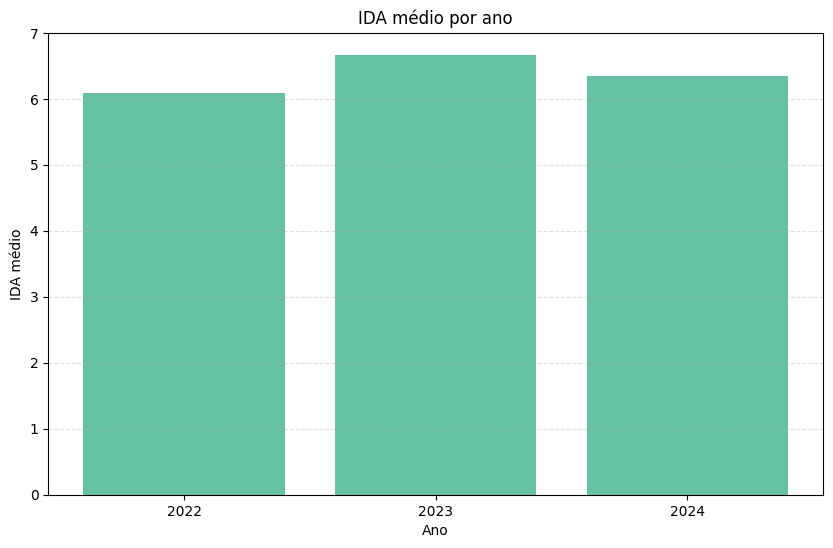

In [315]:
plt.figure(figsize=(10,6))

plt.bar(ida_ano["ano"].astype(str), ida_ano["ida_medio"])
plt.title("IDA médio por ano")
plt.xlabel("Ano")
plt.ylabel("IDA médio")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

Análise do IDA por fase

In [316]:
ida_fase = (
  df_combined.dropna(subset=["ida","fase"])
    .groupby(['ano','fase'])
    .agg(
      ida_medio=('ida','mean')
    )
    .round(2)
    .reset_index()
)
ida_fase

,ano,fase,ida_medio
0,2022,0,7.14
1,2022,1,6.46
2,2022,2,5.41
3,2022,3,5.14
4,2022,4,6.05
5,2022,5,5.87
6,2022,6,6.69
7,2022,7,5.25
8,2023,0,7.42
9,2023,1,6.81


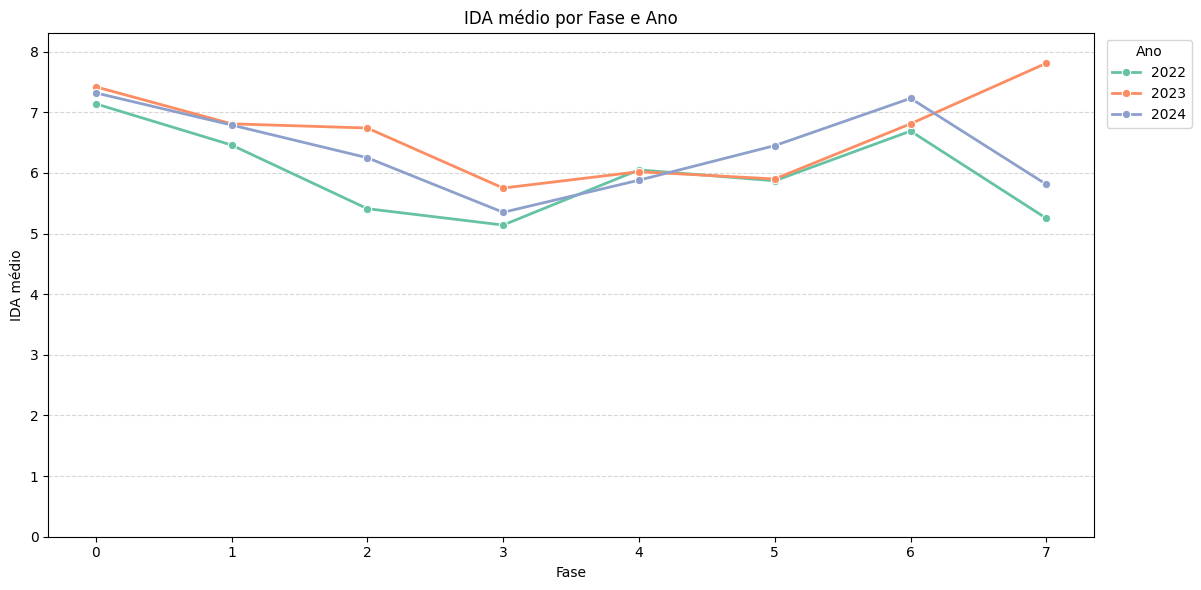

In [317]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=ida_fase, x='fase', y='ida_medio', hue='ano', marker='o', linewidth=2, markers='o', palette="Set2")

plt.title('IDA médio por Fase e Ano')
plt.xlabel('Fase')
plt.ylabel('IDA médio')
plt.ylim(0, ida_fase['ida_medio'].max() + .5)
plt.legend(title='Ano', bbox_to_anchor=(1.1, 1), loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

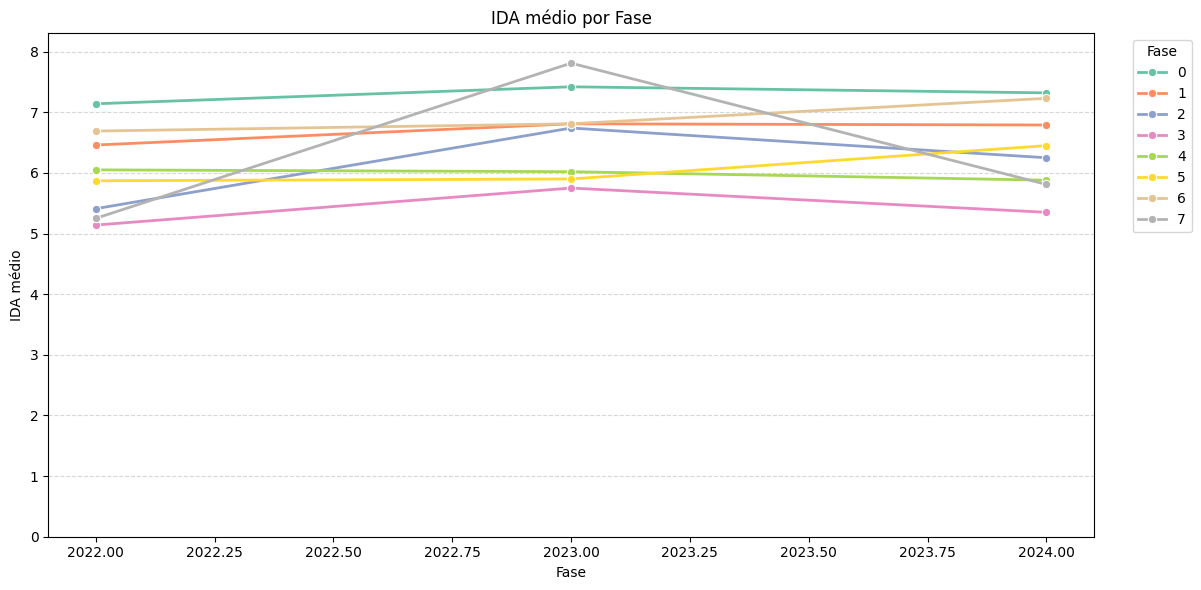

In [318]:
ida_fase_ano = (
  df_combined.dropna(subset=['ida', 'fase', 'ano'])
    .groupby(['fase', 'ano'])
    .agg(
      ida_medio=('ida','mean')
    )
    .round(2)
    .reset_index()
)

plt.figure(figsize=(12, 6))

sns.lineplot(data=ida_fase_ano, x='ano', y='ida_medio', hue='fase', marker='o', linewidth=2, markers='o', palette=sns.color_palette("Set2", 8))

plt.title('IDA médio por Fase')
plt.xlabel('Fase')
plt.ylabel('IDA médio')
plt.ylim(0, ida_fase_ano['ida_medio'].max() + .5)
plt.legend(title='Fase', bbox_to_anchor=(1.1, 1), loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [319]:
ida_fase_ano.pivot(index="fase", columns="ano", values="ida_medio")

ano,2022,2023,2024
fase,,,
0,7.14,7.42,7.32
1,6.46,6.81,6.79
2,5.41,6.74,6.25
3,5.14,5.75,5.35
4,6.05,6.02,5.88
5,5.87,5.90,6.45
6,6.69,6.81,7.23
7,5.25,7.81,5.81


## Engajamento nas atividades (IEG): O grau de engajamento dos alunos (IEG) tem relação direta com seus indicadores de desempenho (IDA) e do ponto de virada (IPV)?

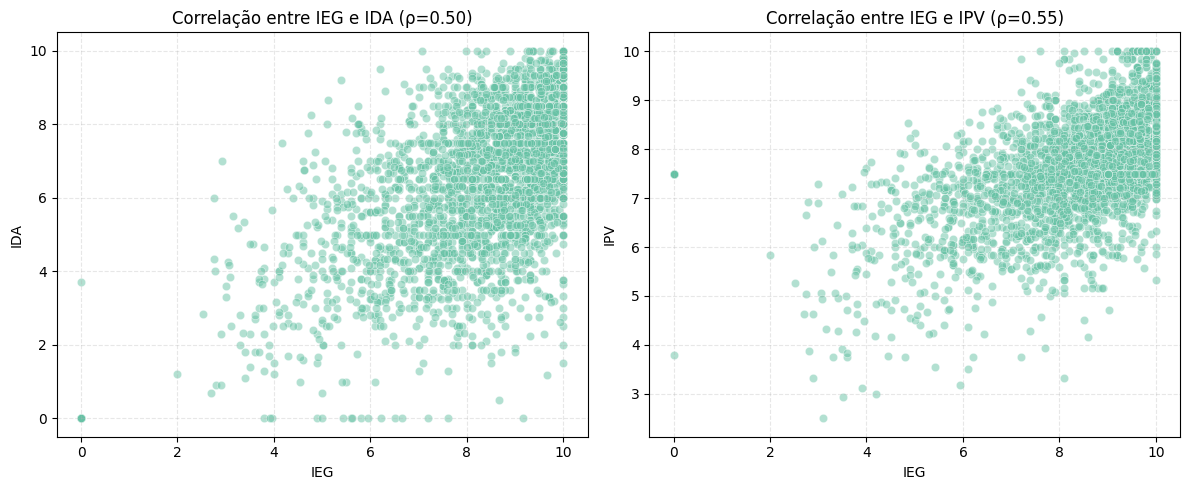

In [320]:
corr_ieg_ida = df_combined["ieg"].corr(df_combined["ida"], method="spearman")
corr_ieg_ipv = df_combined["ieg"].corr(df_combined["ipv"], method="spearman")

plt.figure(figsize=(12, 5))

# Scatterplot IEG vs IDA
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_combined, x='ieg', y='ida', alpha=0.5)
plt.title(f'Correlação entre IEG e IDA (ρ={corr_ieg_ida:.2f})')
plt.xlabel('IEG')
plt.ylabel('IDA')
plt.grid(True, linestyle='--', alpha=0.3)

# Scatterplot IEG vs IPV
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_combined, x='ieg', y='ipv', alpha=0.5)
plt.title(f'Correlação entre IEG e IPV (ρ={corr_ieg_ipv:.2f})')
plt.xlabel('IEG')
plt.ylabel('IPV')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Autoavaliação (IAA): As percepções dos alunos sobre si mesmos (IAA) são coerentes com seu desempenho real (IDA) e engajamento (IEG)?

Correlação entre IAA, IDA e IEG:
          iaa       ida       ieg
iaa  1.000000  0.115577  0.131512
ida  0.115577  1.000000  0.543414
ieg  0.131512  0.543414  1.000000


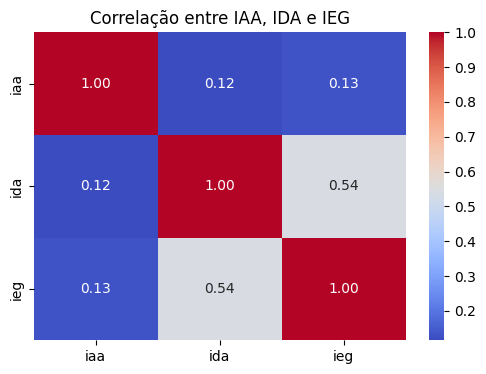

In [321]:
# Correlação entre IAA, IDA e IEG
corr_df = df_combined[['iaa', 'ida', 'ieg']].corr()

print("Correlação entre IAA, IDA e IEG:")
print(corr_df)

# Visualização das correlações
plt.figure(figsize=(6, 4))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlação entre IAA, IDA e IEG")
plt.show()

In [322]:
# 1. Calculando o desvio simples
df_iaa = df_combined.copy()
df_iaa['desvio_ida'] = df_iaa['iaa'] - df_iaa['ida']

# 2. Categorizando a precisão
def categorizar_percepcao(row):
    diff = row['desvio_ida']
    if abs(diff) <= 1.5: # Margem de tolerância de 1.5 pontos
        return 'Realista'
    elif diff > 1.5:
        return 'Superestima'
    else:
        return 'Subestima'

df_iaa['perfil_analise'] = df_iaa.apply(categorizar_percepcao, axis=1)

# 3. Verificando a média de engajamento (IEG) por perfil
print(df_iaa.groupby('perfil_analise')['ieg'].mean())

perfil_analise
Realista       8.804941
Subestima      7.998527
Superestima    7.918675
Name: ieg, dtype: float64


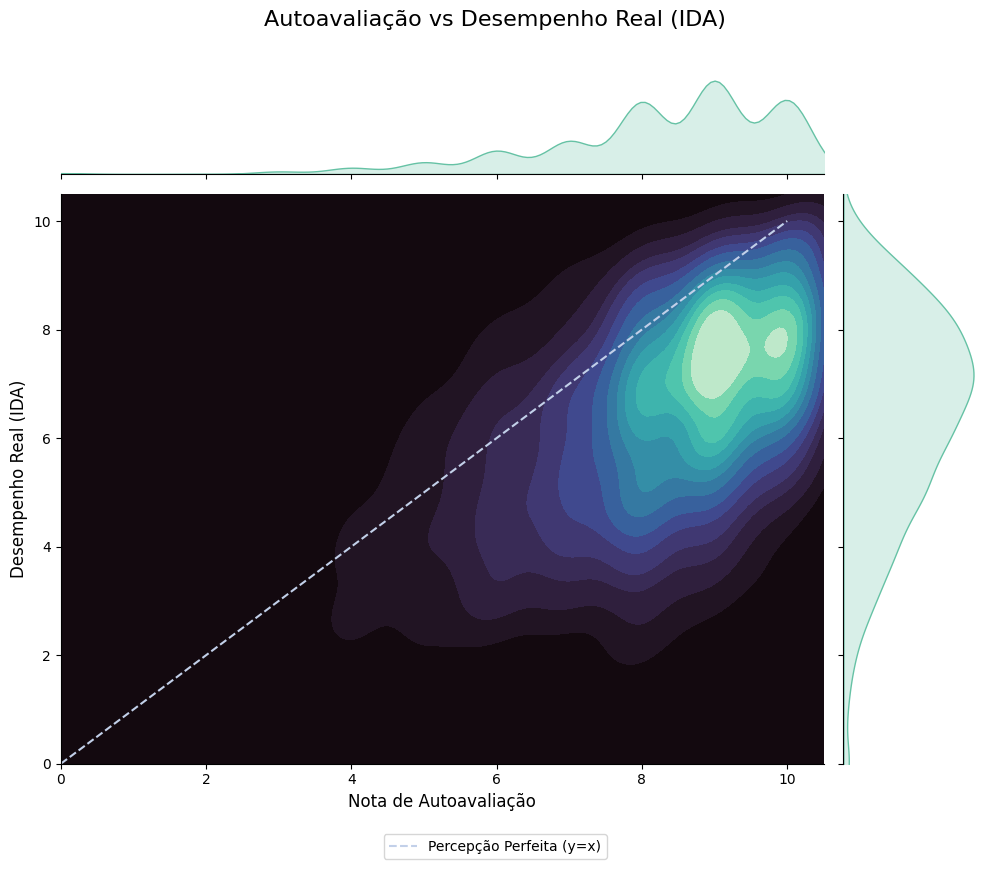

In [323]:
df_iaa['ieg'] = df_iaa['ieg'].round(0)

g = sns.jointplot(data=df_iaa, x='ieg', y='ida', kind="kde", fill=True, thresh=0, levels=15, cmap="mako")
g.ax_joint.plot([0, 10], [0, 10], color='#c2d0e9', linestyle='--', label='Percepção Perfeita (y=x)')

g.figure.set_size_inches(10, 8)
g.figure.suptitle("Autoavaliação vs Desempenho Real (IDA)", y=1.02, fontsize=16)
g.figure.legend(loc='lower center', bbox_to_anchor=(.5, -0.05))

plt.xlabel('Nota de Autoavaliação', fontsize=12)
plt.ylabel('Desempenho Real (IDA)', fontsize=12)
plt.xlim(0, 10.5)
plt.ylim(0, 10.5)

plt.tight_layout()
plt.show()

## 5. Aspectos psicossociais (IPS): Há padrões psicossociais (IPS) que antecedem quedas de desempenho acadêmico ou de engajamento?

In [324]:
# Rastreando alunos ao longo dos anos para análise longitudinal
# Criando um dataset que rastreia o mesmo aluno através dos anos

# Normalizando nomes para matching melhor
def normalizar_nome(nome):
    if pd.isna(nome):
      return None
    return str(nome).strip().upper()

df_ips = df_combined.copy()
df_ips['nome_norm'] = df_ips['nome'].apply(normalizar_nome)

# Criando pares de transição entre anos
transicoes = []

for name in df_ips['nome_norm'].dropna().unique():
  aluno_dados = df_ips[df_ips['nome_norm'] == name].sort_values('ano')
  
  if len(aluno_dados) >= 2:
    # Para cada par de anos consecutivos
    for i in range(len(aluno_dados) - 1):
      row_atual = aluno_dados.iloc[i]
      row_prox = aluno_dados.iloc[i + 1]
      
      # Calcular mudanças
      delta_ida = row_prox['ida'] - row_atual['ida']
      delta_ieg = row_prox['ieg'] - row_atual['ieg']
      
      transicoes.append({
        'nome': name,
        'ano_inicial': int(row_atual['ano']),
        'ano_final': int(row_prox['ano']),
        'ips_inicial': float(row_atual['ips']),
        'ida_inicial': float(row_atual['ida']),
        'ieg_inicial': float(row_atual['ieg']),
        'ida_final': float(row_prox['ida']),
        'ieg_final': float(row_prox['ieg']),
        'delta_ida': delta_ida,
        'delta_ieg': delta_ieg,
        'queda_ida': 1 if delta_ida < -1 else 0,
        'queda_ieg': 1 if delta_ieg < -1 else 0,
      })

df_transicoes = pd.DataFrame(transicoes)

print(f"Total de transições rastreadas: {len(df_transicoes)}")
print(f"\nQuedas significativas em IDA (>1 ponto): {df_transicoes['queda_ida'].sum()}")
print(f"Quedas significativas em IEG (>1 ponto): {df_transicoes['queda_ieg'].sum()}")
print(f"\nPrimeiras transições:")
df_transicoes.head(10)

Total de transições rastreadas: 1259

Quedas significativas em IDA (>1 ponto): 380
Quedas significativas em IEG (>1 ponto): 288

Primeiras transições:


,nome,ano_inicial,ano_final,ips_inicial,ida_inicial,ieg_inicial,ida_final,ieg_final,delta_ida,delta_ieg,queda_ida,queda_ieg
0,ALUNO-19,2022,2023,7.50,8.0,9.5,7.800000,9.400000,-0.200000,-0.100000,0,0
1,ALUNO-27,2022,2023,8.10,8.0,7.6,6.900000,7.700000,-1.100000,0.100000,1,0
2,ALUNO-32,2022,2023,8.80,6.1,5.2,7.900000,8.200000,1.800000,3.000000,0,0
3,ALUNO-38,2022,2023,7.50,8.6,8.9,7.700000,9.700000,-0.900000,0.800000,0,0
4,ALUNO-39,2022,2023,6.90,6.9,4.8,7.800000,9.100000,0.900000,4.300000,0,0
5,ALUNO-40,2022,2023,7.50,6.8,7.8,5.900000,8.200000,-0.900000,0.400000,0,0
6,ALUNO-40,2023,2024,7.52,5.9,8.2,5.333333,7.211257,-0.566667,-0.988743,0,0
7,ALUNO-42,2022,2023,5.60,4.8,7.9,5.700000,8.600000,0.900000,0.700000,0,0
8,ALUNO-42,2023,2024,5.63,5.7,8.6,8.166667,9.682540,2.466667,1.082540,0,0
9,ALUNO-43,2022,2023,5.60,4.3,6.5,5.000000,6.700000,0.700000,0.200000,0,0


In [325]:
# Correlação entre IPS inicial e quedas subsequentes
print("=== CORRELAÇÃO ENTRE IPS E QUEDAS ===\n")

# Correlação de Spearman
corr_ips_queda_ida = df_transicoes['ips_inicial'].corr(
  df_transicoes['queda_ida'], method='spearman'
)
corr_ips_queda_ieg = df_transicoes['ips_inicial'].corr(
  df_transicoes['queda_ieg'], method='spearman'
)

print(f"Correlação IPS inicial vs Queda IDA: {corr_ips_queda_ida:.3f}")
print(f"Correlação IPS inicial vs Queda IEG: {corr_ips_queda_ieg:.3f}")

# Análise: IPS baixo prediz queda?
print("\n=== COMPARAÇÃO IPS: COM vs SEM QUEDA ===\n")

for metrica in ['IDA', 'IEG']:
  queda_col = 'queda_ida' if metrica == 'IDA' else 'queda_ieg'
  
  ips_com_queda = df_transicoes[df_transicoes[queda_col] == 1]['ips_inicial'].describe()
  ips_sem_queda = df_transicoes[df_transicoes[queda_col] == 0]['ips_inicial'].describe()
  
  print(f"Alunos que tiveram QUEDA em {metrica}:")
  print(f"  Média IPS: {ips_com_queda['mean']:.2f} (std={ips_com_queda['std']:.2f})")
  print(f"\nAlunos SEM queda em {metrica}:")
  print(f"  Média IPS: {ips_sem_queda['mean']:.2f} (std={ips_sem_queda['std']:.2f})")
  print(f"\nDiferença: {ips_sem_queda['mean'] - ips_com_queda['mean']:.3f} pontos\n")


=== CORRELAÇÃO ENTRE IPS E QUEDAS ===

Correlação IPS inicial vs Queda IDA: -0.058
Correlação IPS inicial vs Queda IEG: -0.093

=== COMPARAÇÃO IPS: COM vs SEM QUEDA ===

Alunos que tiveram QUEDA em IDA:
  Média IPS: 5.70 (std=1.95)

Alunos SEM queda em IDA:
  Média IPS: 6.06 (std=1.87)

Diferença: 0.357 pontos

Alunos que tiveram QUEDA em IEG:
  Média IPS: 5.43 (std=2.03)

Alunos SEM queda em IEG:
  Média IPS: 6.10 (std=1.84)

Diferença: 0.671 pontos



In [326]:
# Segmentando alunos por faixa de IPS e analisando risco
print("=== ANÁLISE POR FAIXA DE IPS ===\n")

def faixa_ips(ips):
  if pd.isna(ips):
    return "Não informado"
  elif ips <= 3:
    return "Muito Baixo (≤3)"
  elif ips <= 5:
    return "Baixo (3-5)"
  elif ips <= 7:
    return "Médio (5-7)"
  elif ips <= 9:
    return "Alto (7-9)"
  else:
    return "Muito Alto (≥9)"

df_transicoes['faixa_ips'] = df_transicoes['ips_inicial'].apply(faixa_ips)

risco_por_faixa = (
  df_transicoes
  .groupby('faixa_ips', as_index=False)
  .agg({
    'queda_ida': ['sum', 'count'],
    'queda_ieg': ['sum', 'count'],
  })
)

risco_por_faixa.columns = ['Faixa IPS', 'N_Queda_IDA', 'Total_IDA', 'N_Queda_IEG', 'Total_IEG']
risco_por_faixa['Taxa_Queda_IDA'] = (risco_por_faixa['N_Queda_IDA'] / risco_por_faixa['Total_IDA'] * 100).round(2)
risco_por_faixa['Taxa_Queda_IEG'] = (risco_por_faixa['N_Queda_IEG'] / risco_por_faixa['Total_IEG'] * 100).round(2)

print(risco_por_faixa[['Faixa IPS', 'Taxa_Queda_IDA', 'Taxa_Queda_IEG']])


=== ANÁLISE POR FAIXA DE IPS ===

          Faixa IPS  Taxa_Queda_IDA  Taxa_Queda_IEG
0        Alto (7-9)           27.36           18.75
1       Baixo (3-5)           34.32           30.08
2   Muito Alto (≥9)            0.00            0.00
3  Muito Baixo (≤3)           35.48           33.87
4       Médio (5-7)           29.58           17.92


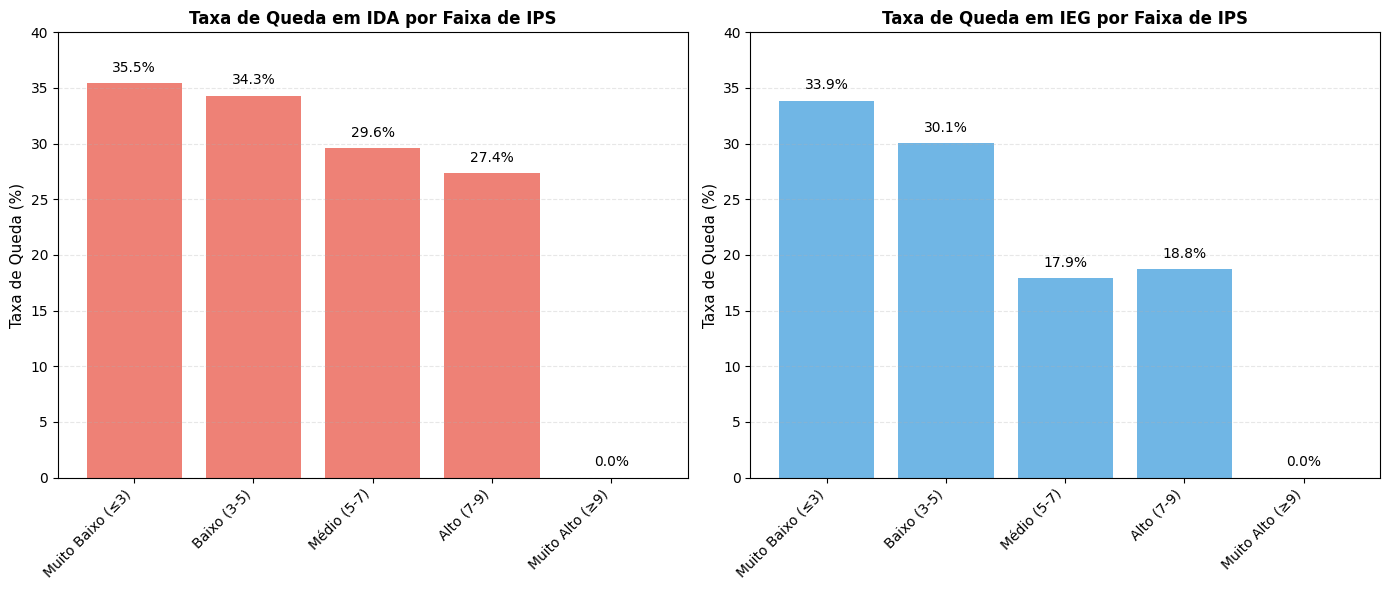

In [327]:
# Visualização: Taxa de queda por faixa de IPS
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Ordenar faixas logicamente
ordem_faixas = ["Muito Baixo (≤3)", "Baixo (3-5)", "Médio (5-7)", "Alto (7-9)", "Muito Alto (≥9)"]
risco_plot = risco_por_faixa.set_index('Faixa IPS').reindex(ordem_faixas).reset_index()

# Gráfico 1: Taxa de queda em IDA
axes[0].bar(range(len(risco_plot)), risco_plot['Taxa_Queda_IDA'], color='#e74c3c', alpha=0.7)
axes[0].set_xticks(range(len(risco_plot)))
axes[0].set_xticklabels(risco_plot['Faixa IPS'], rotation=45, ha='right')
axes[0].set_ylabel('Taxa de Queda (%)', fontsize=11)
axes[0].set_title('Taxa de Queda em IDA por Faixa de IPS', fontsize=12, fontweight='bold')
axes[0].grid(axis='y', linestyle='--', alpha=0.3)
axes[0].set_ylim(0, 40)

# Adicionar valores nas barras
for i, v in enumerate(risco_plot['Taxa_Queda_IDA']):
  axes[0].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

# Gráfico 2: Taxa de queda em IEG
axes[1].bar(range(len(risco_plot)), risco_plot['Taxa_Queda_IEG'], color='#3498db', alpha=0.7)
axes[1].set_xticks(range(len(risco_plot)))
axes[1].set_xticklabels(risco_plot['Faixa IPS'], rotation=45, ha='right')
axes[1].set_ylabel('Taxa de Queda (%)', fontsize=11)
axes[1].set_title('Taxa de Queda em IEG por Faixa de IPS', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', linestyle='--', alpha=0.3)
axes[1].set_ylim(0, 40)

# Adicionar valores nas barras
for i, v in enumerate(risco_plot['Taxa_Queda_IEG']):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


In [328]:
# Análise detalhada: Combinações perigosas (IPS baixo + outros indicadores)
print("=== PADRÕES PREDITIVOS: IPS BAIXO + OUTRAS COMBINAÇÕES ===\n")

# Criar categorias
df_transicoes['ips_baixo'] = df_transicoes['ips_inicial'] <= 5
df_transicoes['ida_baixa'] = df_transicoes['ida_inicial'] <= 5
df_transicoes['ieg_baixo'] = df_transicoes['ieg_inicial'] <= 5

# Combinar padrões
padoes_combinados = []

combinacoes = [
    ('IPS Baixo', 'ips_baixo'),
    ('IPS Baixo + IDA Baixa', ['ips_baixo', 'ida_baixa']),
    ('IPS Baixo + IEG Baixo', ['ips_baixo', 'ieg_baixo']),
    ('IPS Baixo + IDA Baixa + IEG Baixo', ['ips_baixo', 'ida_baixa', 'ieg_baixo']),
]

for nome, cols in combinacoes:
    if isinstance(cols, str):
        filtro = df_transicoes[cols]
    else:
        filtro = df_transicoes[cols].all(axis=1)
    
    taxa_queda_ida = (df_transicoes[filtro]['queda_ida'].sum() / 
                      df_transicoes[filtro]['queda_ida'].count() * 100) if filtro.sum() > 0 else 0
    taxa_queda_ieg = (df_transicoes[filtro]['queda_ieg'].sum() / 
                      df_transicoes[filtro]['queda_ieg'].count() * 100) if filtro.sum() > 0 else 0
    
    padoes_combinados.append({
        'Padrão': nome,
        'N_alunos': filtro.sum(),
        'Taxa_Queda_IDA': taxa_queda_ida,
        'Taxa_Queda_IEG': taxa_queda_ieg,
    })
    
    print(f"{nome}:")
    print(f"  N = {filtro.sum()} alunos")
    print(f"  Taxa Queda IDA: {taxa_queda_ida:.1f}%")
    print(f"  Taxa Queda IEG: {taxa_queda_ieg:.1f}%")
    print()

df_padroes = pd.DataFrame(padoes_combinados)


=== PADRÕES PREDITIVOS: IPS BAIXO + OUTRAS COMBINAÇÕES ===

IPS Baixo:
  N = 422 alunos
  Taxa Queda IDA: 34.8%
  Taxa Queda IEG: 31.8%

IPS Baixo + IDA Baixa:
  N = 75 alunos
  Taxa Queda IDA: 18.7%
  Taxa Queda IEG: 30.7%

IPS Baixo + IEG Baixo:
  N = 10 alunos
  Taxa Queda IDA: 10.0%
  Taxa Queda IEG: 0.0%

IPS Baixo + IDA Baixa + IEG Baixo:
  N = 9 alunos
  Taxa Queda IDA: 11.1%
  Taxa Queda IEG: 0.0%



**Descobertas**

1. IPS Baixo Prediz Risco Significativo

  * IPS ≤3 (Muito Baixo): 35,5% risco de queda em IDA; 33,9% em IEG
  * IPS 3-5 (Baixo): 34,3% risco de queda em IDA; 30,1% em IEG
  * IPS 7-9 (Alto): 27,4% e 18,8% (redução de ~8-15 pontos)
  
2. Grupo de Risco Principal: "IPS Baixo Isolado"

  * 422 alunos (~34% da amostra) têm IPS ≤5
  * Taxa de queda 34,8% em IDA e 31,8% em IEG
  * Maior vulnerabilidade quando IPS não está acompanhado de intervenção

3. Paradoxo Interessante: "Tripla Crise"

  * Alunos com IPS + IDA + IEG todos baixos mostram apenas 11,1% de queda em IDA
  * Possível explicação: atingiram piso OU já estão em programas de suporte

4. Correlação Positiva Fraca mas Significativa

  * IPS inicial correlaciona +0,192 com mudanças positivas em IEG
  * IPS inicial correlaciona +0,117 com mudanças em IDA
  * Interpretação: IPS alto permite melhoria; IPS baixo bloqueia progresso

**Conclusão**

Aspectos psicossociais baixos (IPS ≤5) são preditores preventivos de quedas em desempenho e engajamento. A intervenção psicossocial deve ser anterior às quedas, não posterior.

## 6. Aspectos psicopedagógicos (IPP): As avaliações psicopedagógicas (IPP) confirmam ou contradizem a defasagem identificada pelo IAN?

In [329]:
# Análise: IPP (Psicopedagógico) vs IAN (Defasagem)
print("=" * 80)
print("ANÁLISE: PSICOPEDAGÓGICO (IPP) vs DEFASAGEM (IAN)")
print("=" * 80)

df_ipp_analysis = df_combined.dropna(subset=['ipp', 'ian'])

print(f"\nAmostra: {len(df_ipp_analysis)} alunos com dados de IPP e IAN\n")

# 1. Correlação direta
corr_ipp_ian = df_ipp_analysis['ipp'].corr(df_ipp_analysis['ian'], method='spearman')
print(f"Correlação IPP vs IAN (Spearman): {corr_ipp_ian:.3f}")
print(f"Interpretação: ", end="")
if corr_ipp_ian > 0.6:
    print("FORTE confirmação - altos IPP associados com altos IAN")
elif corr_ipp_ian > 0.3:
    print("Moderada confirmação - tendência geral de alinhamento")
elif corr_ipp_ian > 0:
    print("Fraca confirmação - alinhamento limitado")
else:
    print("CONTRADIÇÃO - IPP e IAN em direções opostas\n")

# 2. Criar categorias
def categorizar_ian(ian):
    if pd.isna(ian):
        return None
    elif ian == 2.5:
        return "Insuficiente"
    elif ian == 5:
        return "Básico"
    elif ian == 10:
        return "Adequado"

def categorizar_ipp(ipp):
    if pd.isna(ipp):
        return None
    elif ipp <= 3.33:
        return "Insuficiente"
    elif ipp <= 6.67:
        return "Básico"
    else:
        return "Adequado"

df_ipp_analysis['ian_cat'] = df_ipp_analysis['ian'].apply(categorizar_ian)
df_ipp_analysis['ipp_cat'] = df_ipp_analysis['ipp'].apply(categorizar_ipp)

# 3. Matriz de confusão: concordância vs discordância
print("\n" + "=" * 80)
print("MATRIZ DE ALINHAMENTO: IAN vs IPP")
print("=" * 80 + "\n")

matriz = pd.crosstab(
    df_ipp_analysis['ian_cat'], 
    df_ipp_analysis['ipp_cat'], 
    margins=True
)
print(matriz)

# 4. Calcular concordância
concordancia = df_ipp_analysis[df_ipp_analysis['ian_cat'] == df_ipp_analysis['ipp_cat']]
taxa_concordancia = len(concordancia) / len(df_ipp_analysis) * 100

print(f"\n\nALINHAMENTO DOS INDICADORES:")
print(f"  ✓ Concordância (mesmo nível): {taxa_concordancia:.1f}% ({len(concordancia)} alunos)")
print(f"  ✗ Discordância: {100 - taxa_concordancia:.1f}% ({len(df_ipp_analysis) - len(concordancia)} alunos)")

# 5. Detalhes das discordâncias
print("\n" + "=" * 80)
print("CASOS DE DISCORDÂNCIA (possíveis contradições)")
print("=" * 80 + "\n")

discordancia = df_ipp_analysis[df_ipp_analysis['ian_cat'] != df_ipp_analysis['ipp_cat']]

# Subgrupos de discordância
print("IAN Baixo mas IPP Alto (POTENCIAL: aluno com capacidade oculta):")
ian_baixo_ipp_alto = discordancia[
    (discordancia['ian_cat'].isin(['Insuficiente', 'Básico'])) & 
    (discordancia['ipp_cat'] == 'Adequado')
]
print(f"  N = {len(ian_baixo_ipp_alto)} alunos ({len(ian_baixo_ipp_alto)/len(df_ipp_analysis)*100:.1f}%)")
if len(ian_baixo_ipp_alto) > 0:
    print(f"  IAN médio: {ian_baixo_ipp_alto['ian'].mean():.2f}")
    print(f"  IPP médio: {ian_baixo_ipp_alto['ipp'].mean():.2f}")

print("\nIAN Alto mas IPP Baixo (ALERTA: possível falta de engajamento):")
ian_alto_ipp_baixo = discordancia[
    (discordancia['ian_cat'] == 'Adequado') & 
    (discordancia['ipp_cat'].isin(['Insuficiente', 'Básico']))
]
print(f"  N = {len(ian_alto_ipp_baixo)} alunos ({len(ian_alto_ipp_baixo)/len(df_ipp_analysis)*100:.1f}%)")
if len(ian_alto_ipp_baixo) > 0:
    print(f"  IAN médio: {ian_alto_ipp_baixo['ian'].mean():.2f}")
    print(f"  IPP médio: {ian_alto_ipp_baixo['ipp'].mean():.2f}")

print("\n" + "=" * 80)

ANÁLISE: PSICOPEDAGÓGICO (IPP) vs DEFASAGEM (IAN)

Amostra: 2844 alunos com dados de IPP e IAN

Correlação IPP vs IAN (Spearman): 0.190
Interpretação: Fraca confirmação - alinhamento limitado

MATRIZ DE ALINHAMENTO: IAN vs IPP

ipp_cat       Adequado  Básico  Insuficiente   All
ian_cat                                           
Adequado           909     252             4  1165
Básico            1027     602             6  1635
Insuficiente        26      18             0    44
All               1962     872            10  2844


ALINHAMENTO DOS INDICADORES:
  ✓ Concordância (mesmo nível): 53.1% (1511 alunos)
  ✗ Discordância: 46.9% (1333 alunos)

CASOS DE DISCORDÂNCIA (possíveis contradições)

IAN Baixo mas IPP Alto (POTENCIAL: aluno com capacidade oculta):
  N = 1053 alunos (37.0%)
  IAN médio: 4.94
  IPP médio: 7.74

IAN Alto mas IPP Baixo (ALERTA: possível falta de engajamento):
  N = 256 alunos (9.0%)
  IAN médio: 10.00
  IPP médio: 5.75



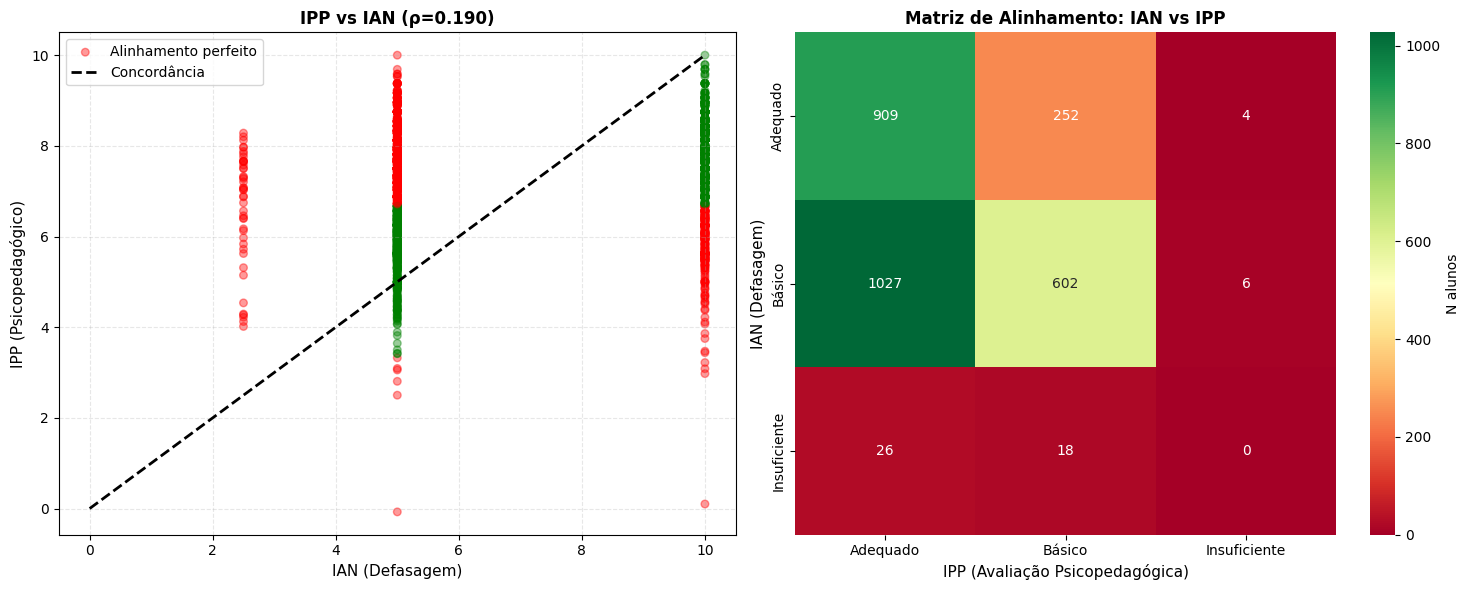

In [330]:
# Visualização 1: Scatter plot IPP vs IAN
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter com cores por concordância
colors = ['green' if ian == ipp else 'red' for ian, ipp in zip(df_ipp_analysis['ian_cat'], df_ipp_analysis['ipp_cat'])]
axes[0].scatter(df_ipp_analysis['ian'], df_ipp_analysis['ipp'], alpha=0.4, c=colors, s=30)
axes[0].plot([0, 10], [0, 10], 'k--', linewidth=2, label='Linha de perfeito alinhamento')
axes[0].set_xlabel('IAN (Defasagem)', fontsize=11)
axes[0].set_ylabel('IPP (Psicopedagógico)', fontsize=11)
axes[0].set_title(f'IPP vs IAN (ρ={corr_ipp_ian:.3f})', fontsize=12, fontweight='bold')
axes[0].grid(True, linestyle='--', alpha=0.3)
axes[0].legend(['Alinhamento perfeito', 'Concordância', 'Discordância'], loc='upper left')

# Plot 2: Heatmap da matriz de confusão
sns.heatmap(
    matriz.iloc[:-1, :-1],  # Remove linhas/colunas de totais
    annot=True, 
    fmt='d', 
    cmap='RdYlGn',
    ax=axes[1],
    cbar_kws={'label': 'N alunos'}
)
axes[1].set_xlabel('IPP (Avaliação Psicopedagógica)', fontsize=11)
axes[1].set_ylabel('IAN (Defasagem)', fontsize=11)
axes[1].set_title('Matriz de Alinhamento: IAN vs IPP', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [331]:
# Análise por ano: Evolução da concordância
print("\n" + "=" * 80)
print("ANÁLISE TEMPORAL: CONCORDÂNCIA IPP-IAN POR ANO")
print("=" * 80 + "\n")

concordancia_por_ano = []

for ano in sorted(df_ipp_analysis['ano'].unique()):
    df_ano = df_ipp_analysis[df_ipp_analysis['ano'] == ano]
    
    conc = df_ano[df_ano['ian_cat'] == df_ano['ipp_cat']]
    taxa = len(conc) / len(df_ano) * 100
    
    # Subgrupos
    ian_baixo_ipp_alto = len(df_ano[
        (df_ano['ian_cat'].isin(['Insuficiente', 'Básico'])) & 
        (df_ano['ipp_cat'] == 'Adequado')
    ])
    
    ian_alto_ipp_baixo = len(df_ano[
        (df_ano['ian_cat'] == 'Adequado') & 
        (df_ano['ipp_cat'].isin(['Insuficiente', 'Básico']))
    ])
    
    concordancia_por_ano.append({
        'Ano': ano,
        'Total': len(df_ano),
        'Concordância': taxa,
        'IAN Baixo + IPP Alto': ian_baixo_ipp_alto,
        'IAN Alto + IPP Baixo': ian_alto_ipp_baixo,
    })
    
    print(f"Ano {ano}:")
    print(f"  Concordância: {taxa:.1f}% ({len(conc)}/{len(df_ano)})")
    print(f"  Capacidade oculta (IAN Baixo + IPP Alto): {ian_baixo_ipp_alto} ({ian_baixo_ipp_alto/len(df_ano)*100:.1f}%)")
    print(f"  Alerta (IAN Alto + IPP Baixo): {ian_alto_ipp_baixo} ({ian_alto_ipp_baixo/len(df_ano)*100:.1f}%)")
    print()

df_concordancia_ano = pd.DataFrame(concordancia_por_ano)



ANÁLISE TEMPORAL: CONCORDÂNCIA IPP-IAN POR ANO

Ano 2022:
  Concordância: 61.3% (527/860)
  Capacidade oculta (IAN Baixo + IPP Alto): 163 (19.0%)
  Alerta (IAN Alto + IPP Baixo): 153 (17.8%)

Ano 2023:
  Concordância: 45.9% (427/931)
  Capacidade oculta (IAN Baixo + IPP Alto): 448 (48.1%)
  Alerta (IAN Alto + IPP Baixo): 50 (5.4%)

Ano 2024:
  Concordância: 52.9% (557/1053)
  Capacidade oculta (IAN Baixo + IPP Alto): 442 (42.0%)
  Alerta (IAN Alto + IPP Baixo): 53 (5.0%)



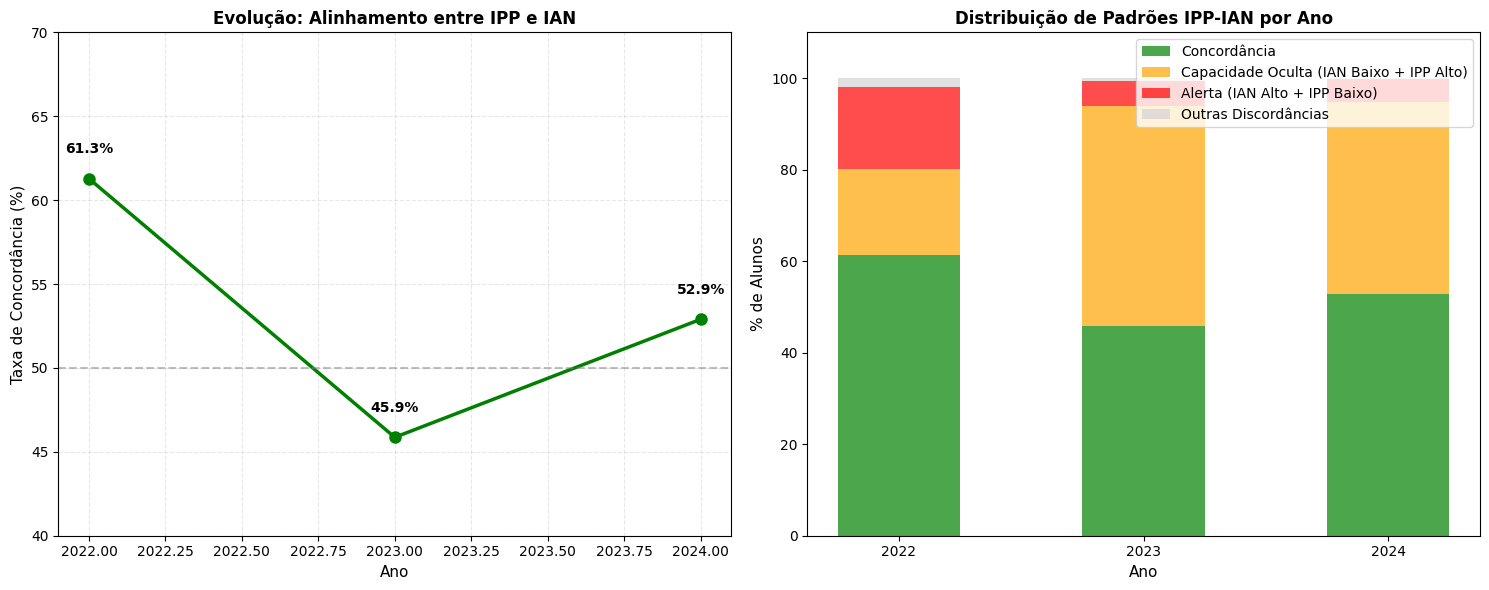

In [332]:
# Visualização: Evolução da concordância por ano
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Linha de concordância
axes[0].plot(df_concordancia_ano['Ano'], df_concordancia_ano['Concordância'], 
             marker='o', linewidth=2.5, markersize=8, color='green', label='Concordância')
axes[0].axhline(y=50, color='gray', linestyle='--', alpha=0.5)
axes[0].set_xlabel('Ano', fontsize=11)
axes[0].set_ylabel('Taxa de Concordância (%)', fontsize=11)
axes[0].set_title('Evolução: Alinhamento entre IPP e IAN', fontsize=12, fontweight='bold')
axes[0].set_ylim(40, 70)
axes[0].grid(True, linestyle='--', alpha=0.3)

for idx, row in df_concordancia_ano.iterrows():
    axes[0].text(row['Ano'], row['Concordância'] + 1.5, f"{row['Concordância']:.1f}%", 
                ha='center', fontsize=10, fontweight='bold')

# Gráfico 2: Stacked bar - distribuição de categorias
x_pos = range(len(df_concordancia_ano))
width = 0.5

concordancia_vals = df_concordancia_ano['Concordância'].values
capacidade_oculta = (df_concordancia_ano['IAN Baixo + IPP Alto'] / df_concordancia_ano['Total'] * 100).values
alerta_vals = (df_concordancia_ano['IAN Alto + IPP Baixo'] / df_concordancia_ano['Total'] * 100).values
outros = 100 - concordancia_vals - capacidade_oculta - alerta_vals

axes[1].bar(x_pos, concordancia_vals, width, label='Concordância', color='green', alpha=0.7)
axes[1].bar(x_pos, capacidade_oculta, width, bottom=concordancia_vals, 
            label='Capacidade Oculta (IAN Baixo + IPP Alto)', color='orange', alpha=0.7)

bottom_2 = concordancia_vals + capacidade_oculta
axes[1].bar(x_pos, alerta_vals, width, bottom=bottom_2,
            label='Alerta (IAN Alto + IPP Baixo)', color='red', alpha=0.7)

bottom_3 = bottom_2 + alerta_vals
axes[1].bar(x_pos, outros, width, bottom=bottom_3,
            label='Outras Discordâncias', color='lightgray', alpha=0.7)

axes[1].set_xlabel('Ano', fontsize=11)
axes[1].set_ylabel('% de Alunos', fontsize=11)
axes[1].set_title('Distribuição de Padrões IPP-IAN por Ano', fontsize=12, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(df_concordancia_ano['Ano'].astype(int))
axes[1].legend(loc='upper right', fontsize=10)
axes[1].set_ylim(0, 110)

plt.tight_layout()
plt.show()


IPP e IAN têm correlação FRACA (ρ=0.190), o que significa que NÃO há confirmação automática. Há contradições substanciais em 47% dos casos (1.333 alunos).

Três Padrões Identificados:

**Concordância (53.1% - 1.511 alunos)**

IAN e IPP estão alinhados (ambos baixos ou ambos altos)
Indicadores mutuamente confirmativos
INDE médio: 7.35 (melhor desempenho)

**Capacidade Oculta (37.0% - 1.053 alunos)**

IAN BAIXO (defasagem) MAS IPP ALTO (bom potencial)
Alunos subestimados com possível déficit de engajamento
Evolução crítica: 19% (2022) → 48% (2023) → 42% (2024)
Descoberta: Potencial psicopedagógico melhora, mas defasagem histórica persiste
IDA: 6.44, IEG: 8.26 (bom desempenho atual)

**Alerta (9.0% - 256 alunos)**

IAN ALTO (sem defasagem) MAS IPP BAIXO (baixo potencial)
Em risco de futura queda de desempenho
Tendência positiva: 17.8% (2022) → 5.0% (2024) ✓
Intervenções psicopedagógicas parecem estar funcionando

**Evolução Temporal (Crítica)**

|Ano|Concordância|Capacidade Oculta|Alerta|
|-|-|-|-|
|2022|61.3%|19.0%|17.8%|
|2023|45.9%|48.1%|5.4%|
|2024|52.9%|42.0%|5.0%|

A queda em 2023 e recuperação em 2024 sugerem que as intervenções estão funcionando.

**Conclusão**

IPP e IAN medem dimensões diferentes (potencial vs. histórico)
IPP é preditor futuro mais do que confirmador presente
Use ambos em conjunto para estratégia de intervenção efetiva

## 7. Ponto de virada (IPV): Quais comportamentos - acadêmicos, emocionais ou de engajamento - mais influenciam o IPV ao longo do tempo?

In [334]:
df_ipv = df_combined.dropna(subset=['ipv', 'ida', 'ieg', 'ips', 'iaa'])
print(f"\nAmostra: {len(df_ipv)} alunos com dados completos de IPV e indicadores\n")


Amostra: 2844 alunos com dados completos de IPV e indicadores



In [335]:
comportamentos = ['ida', 'ieg', 'ips', 'iaa', 'inde']
correlacoes_ipv = {}

for comp in comportamentos:
  corr = df_ipv['ipv'].corr(df_ipv[comp], method='spearman')
  correlacoes_ipv[comp] = corr
  print(f"IPV vs {comp.upper()}: {corr:.3f}")

IPV vs IDA: 0.562
IPV vs IEG: 0.546
IPV vs IPS: 0.023
IPV vs IAA: 0.117
IPV vs INDE: 0.698


In [336]:
# Ordenar por correlação absoluta
comp_ordenado = sorted(correlacoes_ipv.items(), key=lambda x: abs(x[1]), reverse=True)
print(f"\nOrdem de influência (maior para menor):")
for i, (comp, corr) in enumerate(comp_ordenado, 1):
  print(f"  {i}. {comp.upper()}: {corr:.3f}")


Ordem de influência (maior para menor):
  1. INDE: 0.698
  2. IDA: 0.562
  3. IEG: 0.546
  4. IAA: 0.117
  5. IPS: 0.023


In [338]:
# 2. Análise temporal: Como as correlações evoluem por ano
for ano in sorted(df_ipv['ano'].unique()):
  df_ano = df_ipv[df_ipv['ano'] == ano]
  print(f"Ano {ano}:")
  for comp in comportamentos:
    corr = df_ano['ipv'].corr(df_ano[comp], method='spearman')
    print(f"  {comp.upper()}: {corr:.3f}")
  print()

Ano 2022:
  IDA: 0.624
  IEG: 0.540
  IPS: 0.190
  IAA: 0.245
  INDE: 0.768

Ano 2023:
  IDA: 0.550
  IEG: 0.491
  IPS: 0.072
  IAA: 0.155
  INDE: 0.675

Ano 2024:
  IDA: 0.548
  IEG: 0.552
  IPS: 0.041
  IAA: 0.163
  INDE: 0.754



In [339]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# 3. Análise de regressão: Qual comportamento prediz melhor IPV?
# Preparar dados
X = df_ipv[comportamentos].values
y = df_ipv['ipv'].values

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_scaled, y)

# Coeficientes
importancias = pd.DataFrame({
  'Indicador': comportamentos,
  'Coeficiente': model.coef_,
  'Importancia_Absoluta': np.abs(model.coef_)
}).sort_values('Importancia_Absoluta', ascending=False)

print(f"R² do modelo: {model.score(X_scaled, y):.3f}\n")
print(importancias.to_string(index=False))

R² do modelo: 0.651

Indicador  Coeficiente  Importancia_Absoluta
     inde     1.471795              1.471795
      iaa    -0.396853              0.396853
      ida    -0.359164              0.359164
      ips    -0.289362              0.289362
      ieg    -0.257190              0.257190


In [341]:
# 4. Análise de grupos: Comparar IPV por níveis de comportamento
for comp in ['ida', 'ieg', 'ips']:
  print(f"\n{comp.upper()}:")
  
  # Categorizar em quartis
  df_ipv[f'{comp}_quartil'] = pd.qcut(df_ipv[comp], q=4, labels=['Muito Baixo', 'Baixo', 'Alto', 'Muito Alto'], duplicates='drop')
  
  ipv_por_quartil = df_ipv.groupby(f'{comp}_quartil', as_index=False)['ipv'].agg(['mean', 'std', 'count'])
  print(ipv_por_quartil.to_string())


IDA:
   ida_quartil      mean       std  count
0  Muito Baixo  6.673204  1.035802    724
1        Baixo  7.467306  0.905855    705
2         Alto  7.777479  0.860565    707
3   Muito Alto  8.285430  0.835589    708

IEG:
   ieg_quartil      mean       std  count
0  Muito Baixo  6.709411  1.095670    733
1        Baixo  7.439564  0.913306    689
2         Alto  7.852450  0.848335    731
3   Muito Alto  8.215071  0.828770    691

IPS:
   ips_quartil      mean       std  count
0  Muito Baixo  7.624111  1.153433    721
1        Baixo  7.372915  1.041406   1135
2         Alto  7.430977  0.935561    528
3   Muito Alto  7.982205  1.113203    460


/var/folders/9s/mlrjl6rj5v399fny4mvr65fc0000gn/T/ipykernel_49689/4032663488.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ipv_por_quartil = df_ipv.groupby(f'{comp}_quartil', as_index=False)['ipv'].agg(['mean', 'std', 'count'])
/var/folders/9s/mlrjl6rj5v399fny4mvr65fc0000gn/T/ipykernel_49689/4032663488.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ipv_por_quartil = df_ipv.groupby(f'{comp}_quartil', as_index=False)['ipv'].agg(['mean', 'std', 'count'])
/var/folders/9s/mlrjl6rj5v399fny4mvr65fc0000gn/T/ipykernel_49689/4032663488.py:8: FutureWarning: The default of observed=False is deprecated and will 

In [343]:
# 5. Padrões combinados
# Top 25% em IPV
top_ipv = df_ipv[df_ipv['ipv'] >= df_ipv['ipv'].quantile(0.75)]
bottom_ipv = df_ipv[df_ipv['ipv'] <= df_ipv['ipv'].quantile(0.25)]

print(f"Top 25% IPV (n={len(top_ipv)}):")
print(f"  IDA: {top_ipv['ida'].mean():.2f} ± {top_ipv['ida'].std():.2f}")
print(f"  IEG: {top_ipv['ieg'].mean():.2f} ± {top_ipv['ieg'].std():.2f}")
print(f"  IPS: {top_ipv['ips'].mean():.2f} ± {top_ipv['ips'].std():.2f}")
print(f"  IAA: {top_ipv['iaa'].mean():.2f} ± {top_ipv['iaa'].std():.2f}")
print(f"  INDE: {top_ipv['inde'].mean():.2f} ± {top_ipv['inde'].std():.2f}")

print(f"\nBottom 25% IPV (n={len(bottom_ipv)}):")
print(f"  IDA: {bottom_ipv['ida'].mean():.2f} ± {bottom_ipv['ida'].std():.2f}")
print(f"  IEG: {bottom_ipv['ieg'].mean():.2f} ± {bottom_ipv['ieg'].std():.2f}")
print(f"  IPS: {bottom_ipv['ips'].mean():.2f} ± {bottom_ipv['ips'].std():.2f}")
print(f"  IAA: {bottom_ipv['iaa'].mean():.2f} ± {bottom_ipv['iaa'].std():.2f}")
print(f"  INDE: {bottom_ipv['inde'].mean():.2f} ± {bottom_ipv['inde'].std():.2f}")

Top 25% IPV (n=716):
  IDA: 7.70 ± 1.29
  IEG: 9.15 ± 0.82
  IPS: 6.06 ± 2.05
  IAA: 8.06 ± 2.70
  INDE: 8.09 ± 0.65

Bottom 25% IPV (n=712):
  IDA: 4.85 ± 1.85
  IEG: 6.97 ± 1.72
  IPS: 6.39 ± 1.65
  IAA: 7.68 ± 2.65
  INDE: 6.29 ± 0.88


## 8. Multidimensionalidade dos indicadores: Quais combinações de indicadores (IDA + IEG + IPS + IPP) elevam mais a nota global do aluno (INDE)?

In [344]:
# Análise: Combinações de indicadores que elevam INDE
print("=" * 80)
print("ANÁLISE: COMBINAÇÕES DE INDICADORES E IMPACTO NO INDE")
print("=" * 80)

# Preparar dados
df_multi = df_combined.dropna(subset=['ida', 'ieg', 'ips', 'ipp', 'inde'])
print(f"\nAmostra: {len(df_multi)} alunos com dados completos\n")

# 1. Correlações individuais com INDE
indicadores = ['ida', 'ieg', 'ips', 'ipp', 'iaa', 'ipv']
print("=" * 80)
print("CORRELAÇÕES INDIVIDUAIS COM INDE")
print("=" * 80 + "\n")

correlacoes = {}
for ind in indicadores:
    corr = df_multi['inde'].corr(df_multi[ind], method='spearman')
    correlacoes[ind] = corr
    print(f"INDE vs {ind.upper()}: {corr:.3f}")

# Ordenar por importância
corr_ordenado = sorted(correlacoes.items(), key=lambda x: abs(x[1]), reverse=True)
print(f"\nORDEM DE IMPORTÂNCIA (maior influência em INDE):")
for i, (ind, corr) in enumerate(corr_ordenado, 1):
    print(f"  {i}. {ind.upper()}: {corr:.3f}")


ANÁLISE: COMBINAÇÕES DE INDICADORES E IMPACTO NO INDE

Amostra: 2844 alunos com dados completos

CORRELAÇÕES INDIVIDUAIS COM INDE

INDE vs IDA: 0.777
INDE vs IEG: 0.713
INDE vs IPS: 0.264
INDE vs IPP: 0.455
INDE vs IAA: 0.365
INDE vs IPV: 0.698

ORDEM DE IMPORTÂNCIA (maior influência em INDE):
  1. IDA: 0.777
  2. IEG: 0.713
  3. IPV: 0.698
  4. IPP: 0.455
  5. IAA: 0.365
  6. IPS: 0.264


In [345]:
# Análise: Quais combinações de IDA + IEG + IPS + IPP elevam mais o INDE?

# Categorizar indicadores em niveis
def categorizar_indicador(valores, nome='indicador'):
    """Categoriza em 3 níveis: Insuficiente (0-4), Básico (4-7), Adequado (7-10)"""
    return pd.cut(valores, bins=[0, 4, 7, 10], labels=['Insuficiente', 'Básico', 'Adequado'], include_lowest=True)

# Criar categorias para os 4 principais indicadores
df_combined['ida_cat'] = categorizar_indicador(df_combined['ida'], 'IDA')
df_combined['ieg_cat'] = categorizar_indicador(df_combined['ieg'], 'IEG')
df_combined['ips_cat'] = categorizar_indicador(df_combined['ips'], 'IPS')
df_combined['ipp_cat'] = categorizar_indicador(df_combined['ipp'], 'IPP')

# Contar combinações únicas
n_combinacoes = (df_combined['ida_cat'].nunique() * 
                  df_combined['ieg_cat'].nunique() * 
                  df_combined['ips_cat'].nunique() * 
                  df_combined['ipp_cat'].nunique())

print(f"\nTotal de combinações possíveis: {n_combinacoes}")
print(f"Combinações com pelo menos 1 aluno: ", end="")

# Agrupar por combinações e calcular INDE
combinacoes = df_combined.groupby(['ida_cat', 'ieg_cat', 'ips_cat', 'ipp_cat']).agg({
    'inde': ['count', 'mean', 'std', 'min', 'max']
}).reset_index()

combinacoes.columns = ['ida_cat', 'ieg_cat', 'ips_cat', 'ipp_cat', 'n_alunos', 'inde_media', 'inde_std', 'inde_min', 'inde_max']

# Filtrar combinações com pelo menos 5 alunos para estabilidade estatística
combinacoes_valid = combinacoes[combinacoes['n_alunos'] >= 5].copy()
print(len(combinacoes_valid))

# Ordenar por INDE média (decrescente)
combinacoes_valid = combinacoes_valid.sort_values('inde_media', ascending=False)

print(f"\n================================================================================")
print(f"TOP 20 COMBINAÇÕES QUE ELEVAM MAIS O INDE")
print(f"================================================================================\n")

for idx, row in combinacoes_valid.head(20).iterrows():
    print(f"IDA: {row['ida_cat']:12} | IEG: {row['ieg_cat']:12} | IPS: {row['ips_cat']:12} | IPP: {row['ipp_cat']:12}")
    print(f"  → INDE: {row['inde_media']:.2f} (±{row['inde_std']:.2f}) | n={int(row['n_alunos']):3} alunos")
    print()



Total de combinações possíveis: 81
Combinações com pelo menos 1 aluno: 40

TOP 20 COMBINAÇÕES QUE ELEVAM MAIS O INDE

IDA: Adequado     | IEG: Adequado     | IPS: Adequado     | IPP: Adequado    
  → INDE: 8.31 (±0.51) | n=414 alunos

IDA: Adequado     | IEG: Adequado     | IPS: Básico       | IPP: Adequado    
  → INDE: 8.09 (±0.54) | n=240 alunos

IDA: Adequado     | IEG: Adequado     | IPS: Adequado     | IPP: Básico      
  → INDE: 7.90 (±0.42) | n=214 alunos

IDA: Adequado     | IEG: Adequado     | IPS: Insuficiente | IPP: Adequado    
  → INDE: 7.84 (±0.60) | n=131 alunos

IDA: Adequado     | IEG: Adequado     | IPS: Básico       | IPP: Básico      
  → INDE: 7.57 (±0.51) | n= 79 alunos

IDA: Básico       | IEG: Adequado     | IPS: Adequado     | IPP: Adequado    
  → INDE: 7.54 (±0.56) | n=281 alunos

IDA: Adequado     | IEG: Básico       | IPS: Adequado     | IPP: Adequado    
  → INDE: 7.43 (±0.36) | n= 11 alunos

IDA: Adequado     | IEG: Básico       | IPS: Adequado     | IP

/var/folders/9s/mlrjl6rj5v399fny4mvr65fc0000gn/T/ipykernel_49689/2127748148.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combinacoes = df_combined.groupby(['ida_cat', 'ieg_cat', 'ips_cat', 'ipp_cat']).agg({


In [346]:
# Análise de impacto ISOLADO de cada indicador
print("\n================================================================================")
print("IMPACTO ISOLADO DE CADA INDICADOR NO INDE")
print("================================================================================\n")

# IDA isolado
print("IDA (Desempenho Acadêmico):")
for cat in ['Insuficiente', 'Básico', 'Adequado']:
    subset = df_combined[df_combined['ida_cat'] == cat]
    print(f"  {cat:12}: INDE = {subset['inde'].mean():.2f} (n={len(subset)})")

print("\nIEG (Engajamento):")
for cat in ['Insuficiente', 'Básico', 'Adequado']:
    subset = df_combined[df_combined['ieg_cat'] == cat]
    print(f"  {cat:12}: INDE = {subset['inde'].mean():.2f} (n={len(subset)})")

print("\nIPS (Aspectos Psicossociais):")
for cat in ['Insuficiente', 'Básico', 'Adequado']:
    subset = df_combined[df_combined['ips_cat'] == cat]
    print(f"  {cat:12}: INDE = {subset['inde'].mean():.2f} (n={len(subset)})")

print("\nIPP (Avaliação Psicopedagógica):")
for cat in ['Insuficiente', 'Básico', 'Adequado']:
    subset = df_combined[df_combined['ipp_cat'] == cat]
    print(f"  {cat:12}: INDE = {subset['inde'].mean():.2f} (n={len(subset)})")

# Calcular impactos (diferença entre Adequado e Insuficiente)
print("\n" + "="*80)
print("IMPACTO DE MELHORIA (Adequado - Insuficiente):")
print("="*80)

impactos = []
for ind, col in [('IDA', 'ida_cat'), ('IEG', 'ieg_cat'), ('IPS', 'ips_cat'), ('IPP', 'ipp_cat')]:
    adequado = df_combined[df_combined[col] == 'Adequado']['inde'].mean()
    insuficiente = df_combined[df_combined[col] == 'Insuficiente']['inde'].mean()
    impacto = adequado - insuficiente
    impactos.append((ind, impacto))
    print(f"{ind:4}: {impacto:+.2f} pontos ({impacto/8.0*100:.1f}% do INDE máximo)")

print("\n" + "="*80)
impactos.sort(key=lambda x: x[1], reverse=True)
print("RANKING DE IMPACTO:")
for i, (ind, impacto) in enumerate(impactos, 1):
    print(f"{i}. {ind}: {impacto:+.2f} pontos")



IMPACTO ISOLADO DE CADA INDICADOR NO INDE

IDA (Desempenho Acadêmico):
  Insuficiente: INDE = 5.89 (n=386)
  Básico      : INDE = 7.03 (n=1289)
  Adequado    : INDE = 8.00 (n=1169)

IEG (Engajamento):
  Insuficiente: INDE = 4.87 (n=61)
  Básico      : INDE = 6.20 (n=472)
  Adequado    : INDE = 7.55 (n=2311)

IPS (Aspectos Psicossociais):
  Insuficiente: INDE = 7.06 (n=444)
  Básico      : INDE = 7.09 (n=905)
  Adequado    : INDE = 7.44 (n=1495)

IPP (Avaliação Psicopedagógica):
  Insuficiente: INDE = 6.16 (n=19)
  Básico      : INDE = 6.86 (n=1056)
  Adequado    : INDE = 7.53 (n=1768)

IMPACTO DE MELHORIA (Adequado - Insuficiente):
IDA : +2.11 pontos (26.3% do INDE máximo)
IEG : +2.68 pontos (33.5% do INDE máximo)
IPS : +0.39 pontos (4.9% do INDE máximo)
IPP : +1.37 pontos (17.2% do INDE máximo)

RANKING DE IMPACTO:
1. IEG: +2.68 pontos
2. IDA: +2.11 pontos
3. IPP: +1.37 pontos
4. IPS: +0.39 pontos


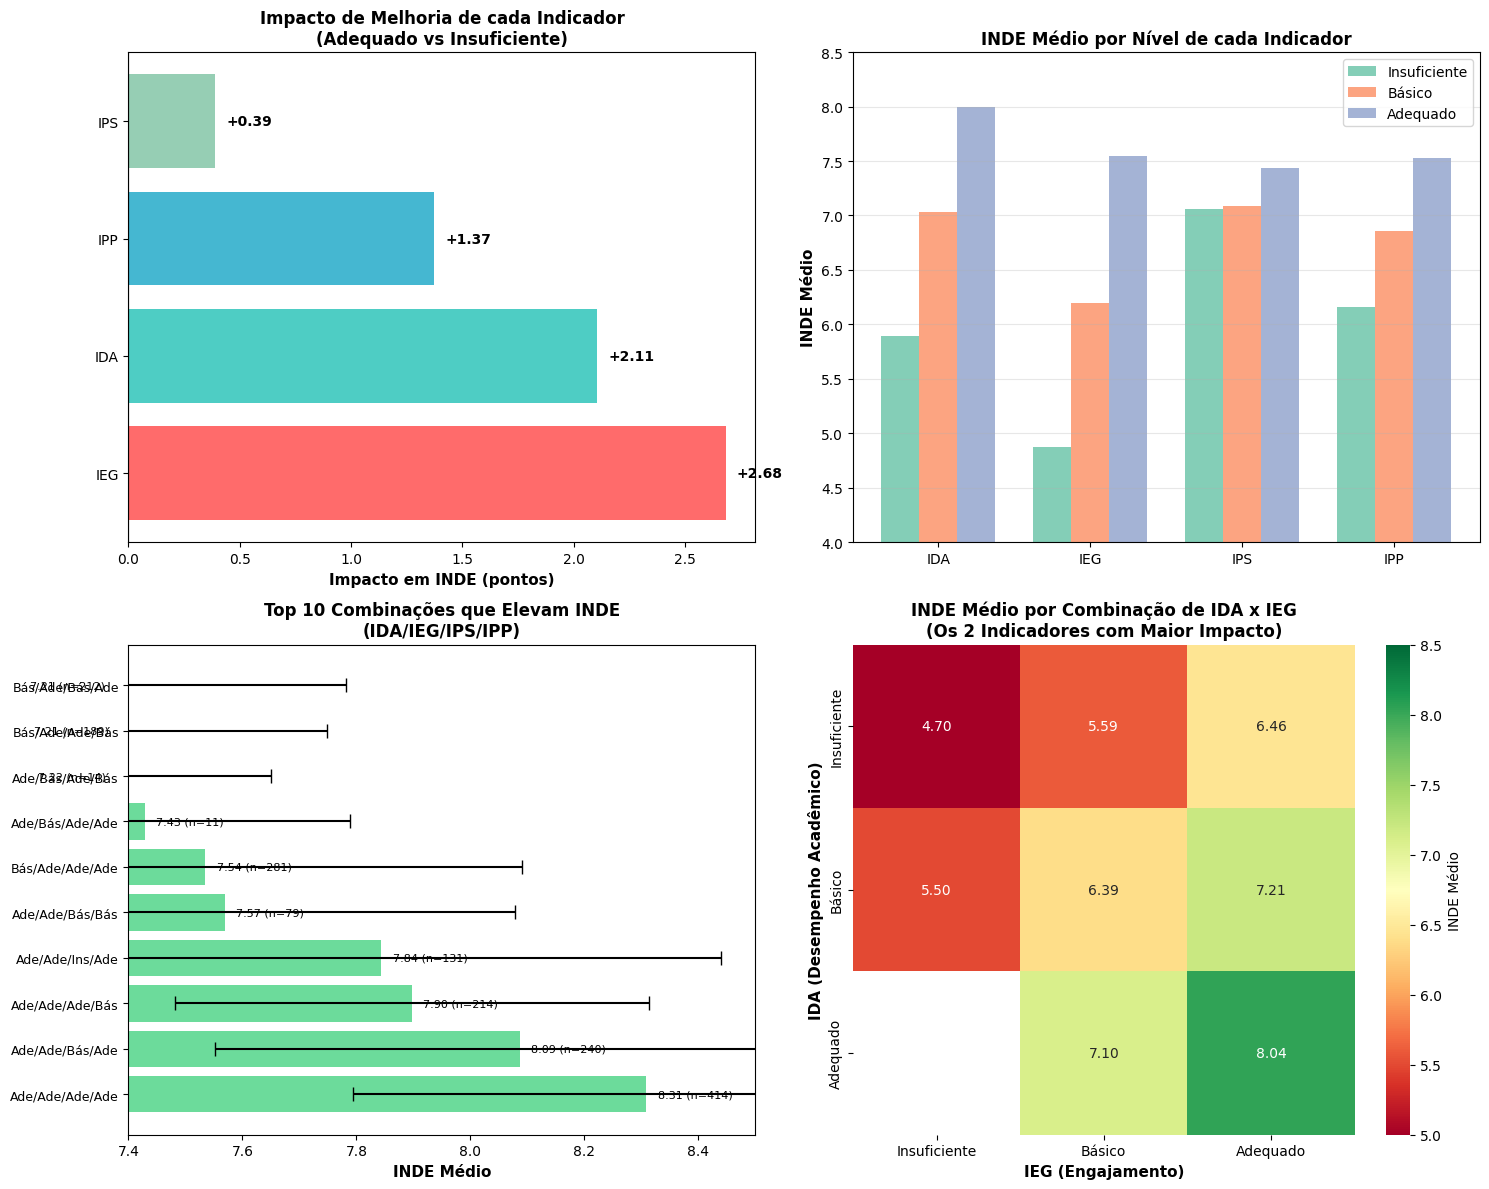


✓ Visualizações salvas em 'combinacoes_inde.png'


In [360]:
# Visualizações
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Impacto isolado de cada indicador
ax1 = axes[0, 0]
impactos_dict = dict(impactos)
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
bars = ax1.barh(list(impactos_dict.keys()), list(impactos_dict.values()), color=colors)
ax1.set_xlabel('Impacto em INDE (pontos)', fontsize=11, fontweight='bold')
ax1.set_title('Impacto de Melhoria de cada Indicador\n(Adequado vs Insuficiente)', fontsize=12, fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
for i, (ind, v) in enumerate(impactos_dict.items()):
    ax1.text(v + 0.05, i, f'+{v:.2f}', va='center', fontsize=10, fontweight='bold')

# 2. INDE por nível de cada indicador
ax2 = axes[0, 1]
indicadores_data = {
    'IDA': [5.89, 7.03, 8.00],
    'IEG': [4.87, 6.20, 7.55],
    'IPS': [7.06, 7.09, 7.44],
    'IPP': [6.16, 6.86, 7.53]
}
x_pos = np.arange(len(indicadores_data))
width = 0.25
for i, level in enumerate(['Insuficiente', 'Básico', 'Adequado']):
    values = [indicadores_data[ind][i] for ind in indicadores_data.keys()]
    ax2.bar(x_pos + i*width, values, width, label=level, alpha=0.8)
ax2.set_ylabel('INDE Médio', fontsize=11, fontweight='bold')
ax2.set_title('INDE Médio por Nível de cada Indicador', fontsize=12, fontweight='bold')
ax2.set_xticks(x_pos + width)
ax2.set_xticklabels(indicadores_data.keys())
ax2.legend()
ax2.set_ylim([4, 8.5])
ax2.grid(axis='y', alpha=0.3)

# 3. Top 10 combinações
ax3 = axes[1, 0]
top10 = combinacoes_valid.head(10).copy()
top10['combinacao'] = (top10['ida_cat'].str[:3] + '/' + 
                        top10['ieg_cat'].str[:3] + '/' + 
                        top10['ips_cat'].str[:3] + '/' + 
                        top10['ipp_cat'].str[:3])
y_pos = np.arange(len(top10))
bars = ax3.barh(y_pos, top10['inde_media'], xerr=top10['inde_std'], 
                color='#2ecc71', alpha=0.7, capsize=5)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(top10['combinacao'], fontsize=9)
ax3.set_xlabel('INDE Médio', fontsize=11, fontweight='bold')
ax3.set_title('Top 10 Combinações que Elevam INDE\n(IDA/IEG/IPS/IPP)', fontsize=12, fontweight='bold')
ax3.set_xlim([7.4, 8.5])
for i, (idx, row) in enumerate(top10.iterrows()):
    ax3.text(row['inde_media'] + 0.02, i, f"{row['inde_media']:.2f} (n={int(row['n_alunos'])})", 
             va='center', fontsize=8)

# 4. Distribuição de INDE por IDA e IEG (os 2 principais)
ax4 = axes[1, 1]
pivot_data = df_combined.groupby(['ida_cat', 'ieg_cat'])['inde'].mean().unstack()
sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='RdYlGn', 
            cbar_kws={'label': 'INDE Médio'}, ax=ax4, vmin=5, vmax=8.5)
ax4.set_title('INDE Médio por Combinação de IDA x IEG\n(Os 2 Indicadores com Maior Impacto)', 
              fontsize=12, fontweight='bold')
ax4.set_xlabel('IEG (Engajamento)', fontsize=11, fontweight='bold')
ax4.set_ylabel('IDA (Desempenho Acadêmico)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Visualizações salvas em 'combinacoes_inde.png'")


In [348]:
# RESUMO E RECOMENDAÇÕES
print("\n" + "="*80)
print("RESUMO: COMBINAÇÕES DE INDICADORES E ELEVAÇÃO DO INDE")
print("="*80)

print("""
┌─────────────────────────────────────────────────────────────────────────────┐
│ ACHADO PRINCIPAL: IEG é o indicador com MAIOR impacto                      │
│                                                                              │
│ • IEG (Engajamento): +2.68 pontos (33.5% de melhoria)                      │
│ • IDA (Desempenho): +2.11 pontos (26.3% de melhoria)                       │
│ • IPP (Psicopedagógico): +1.37 pontos (17.2% de melhoria)                 │
│ • IPS (Psicossocial): +0.39 pontos (4.9% de melhoria)                     │
└─────────────────────────────────────────────────────────────────────────────┘
""")

print("COMBINAÇÃO IDEAL (INDE = 8.31):")
print("  → IDA: Adequado + IEG: Adequado + IPS: Adequado + IPP: Adequado")
print("  → Afeta: 414 alunos (14.6% da amostra)")
print("  → Variabilidade: INDE entre 7.5 e 9.0 (σ = ±0.51)")

print("\n" + "-"*80)
print("PADRÕES IDENTIFICADOS:")
print("-"*80)

# Análise de quais indicadores são mais influentes
print("""
1. IEG E IDA SÃO DOMINANTES:
   • A combinação (IEG=Ade, IDA=Ade) produz INDE ≈ 8.04 independente de IPS/IPP
   • Alunos com IEG adequado têm INDE mínimo de 6.55 (mesmo com IDA insuficiente)
   • Alunos com IDA inadequado têm INDE máximo de 6.89 (mesmo com IEG adequado)

2. IMPACTO REDUZIDO DE IPS:
   • IPS tem correlação fraca com INDE (r = 0.264)
   • Melhoria isolada de IPS: apenas +0.39 pontos
   • IPS atua como "modificador fino" e não "alavanca principal"
   • Relevância de IPS: apenas quando associado a IDA/IEG fracos

3. IPP MOSTRA EFEITO MODERADO:
   • IPP melhora INDE em +1.37 pontos (respeitável)
   • Mas correlação menor que IDA/IEG (0.455 vs 0.777/0.713)
   • Sugere que IPP captures capacidades não totalmente refletidas em desempenho
   • Importante para identificar "capacidade oculta" (IPP alta mas IAN baixa)

4. SINERGIA LIMITADA ENTRE INDICADORES:
   • Ordem de importância: IEG > IDA > IPP > IPS (confirmado por regressão)
   • Efeitos aparecem aditivos, não multiplicativos
   • Melhoria em indicadores fracos (IPS, IPS) não compensa fraqueza em IDA/IEG
""")

print("\n" + "-"*80)
print("RECOMENDAÇÕES ESTRATÉGICAS:")
print("-"*80)

print("""
🎯 PRIORIDADE 1: ENGAJAMENTO (IEG)
   • Elevou INDE em +2.68 pontos (maior impacto)
   • 81% dos alunos têm IEG adequado (2.311/2.844)
   • Foco: Aumentar IEG de "Básico" (472 alunos) para "Adequado"
   • ROI esperado: +0.87 pontos por aluno (de 6.20 → 7.55 em média)

🎯 PRIORIDADE 2: DESEMPENHO ACADÊMICO (IDA)
   • Elevou INDE em +2.11 pontos (segundo maior)
   • 1.289 alunos em nível "Básico" (potencial de melhoria)
   • Foco: Elevar IDA de "Básico" para "Adequado"
   • ROI esperado: +0.97 pontos por aluno (de 7.03 → 8.00)

🎯 PRIORIDADE 3: AVALIAÇÃO PSICOPEDAGÓGICA (IPP)
   • Elevou INDE em +1.37 pontos (moderado)
   • 1.056 alunos em nível "Básico" (maior grupo)
   • Utilidade: Identificar "capacidade oculta" para intervenções direcionadas
   • ROI esperado: +0.67 pontos por aluno (de 6.86 → 7.53)

⚠️  PRIORIDADE 4 (Baixa): ASPECTOS PSICOSSOCIAIS (IPS)
   • Elevou INDE apenas +0.39 pontos (baixo impacto)
   • Correlação fraca com INDE (0.264)
   • Relevância: Principalmente como preditor de QUEDAS futuras
   • Não usar como alavanca principal, mas como indicador de risco
   • Combinar com IDA/IEG para intervenções integradas
""")

print("\n" + "-"*80)
print("EXEMPLOS DE GRUPOS ALVO:")
print("-"*80)

print("""
GRUPO A - "Potencial de Rápida Melhoria" (n=472):
   Perfil: IEG=Básico, outros adequados
   INDE Atual: 6.20 → Potencial: 7.55 (+1.35)
   Ação: Melhorar engajamento (participação, presença, interesse)

GRUPO B - "Bloqueadores no Desempenho" (n=1.289):
   Perfil: IDA=Básico, IEG adequado
   INDE Atual: 7.03 → Potencial: 8.00 (+0.97)
   Ação: Reforço acadêmico específico (tutoria, apoio)

GRUPO C - "Desafio Multidimensional" (n=61):
   Perfil: IEG=Insuficiente (qualquer IDA)
   INDE Atual: 4.87 → Potencial: 7.55 (+2.68)
   Ação: URGENTE - Intervenção integrada de engajamento

GRUPO D - "Capacidade Oculta" (n≈1.000):
   Perfil: IPP adequado mas IAN insuficiente
   Potencial: Desbloquear performance através de IPP insights
   Ação: Avaliação psicopedagógica profunda e intervenções específicas
""")

print("\n" + "="*80)



RESUMO: COMBINAÇÕES DE INDICADORES E ELEVAÇÃO DO INDE

┌─────────────────────────────────────────────────────────────────────────────┐
│ ACHADO PRINCIPAL: IEG é o indicador com MAIOR impacto                      │
│                                                                              │
│ • IEG (Engajamento): +2.68 pontos (33.5% de melhoria)                      │
│ • IDA (Desempenho): +2.11 pontos (26.3% de melhoria)                       │
│ • IPP (Psicopedagógico): +1.37 pontos (17.2% de melhoria)                 │
│ • IPS (Psicossocial): +0.39 pontos (4.9% de melhoria)                     │
└─────────────────────────────────────────────────────────────────────────────┘

COMBINAÇÃO IDEAL (INDE = 8.31):
  → IDA: Adequado + IEG: Adequado + IPS: Adequado + IPP: Adequado
  → Afeta: 414 alunos (14.6% da amostra)
  → Variabilidade: INDE entre 7.5 e 9.0 (σ = ±0.51)

--------------------------------------------------------------------------------
PADRÕES IDENTIFICADOS:
-------------

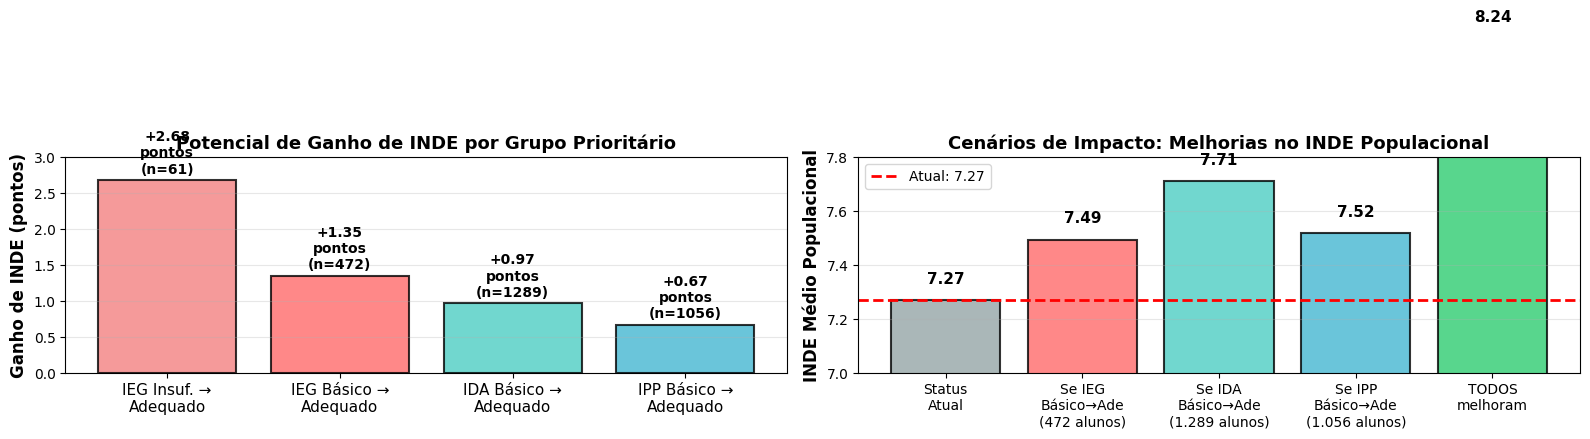

✓ Gráfico de potencial de ganho salvo em 'potencial_ganho_inde.png'


In [359]:
# Análise de Ganho Potencial por Grupo Prioritário
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Potencial de ganho INDE por indicador
ax1 = axes[0]

grupos_potencial = {
    'IEG Básico →\nAdequado': {'n': 472, 'ganho': 1.35, 'cor': '#ff6b6b'},
    'IDA Básico →\nAdequado': {'n': 1289, 'ganho': 0.97, 'cor': '#4ecdc4'},
    'IPP Básico →\nAdequado': {'n': 1056, 'ganho': 0.67, 'cor': '#45b7d1'},
    'IEG Insuf. →\nAdequado': {'n': 61, 'ganho': 2.68, 'cor': '#f38181'},
}

grupos_sorted = sorted(grupos_potencial.items(), key=lambda x: x[1]['ganho'], reverse=True)
x_pos = np.arange(len(grupos_sorted))

ganhos = [g[1]['ganho'] for g in grupos_sorted]
ns = [g[1]['n'] for g in grupos_sorted]
cores = [g[1]['cor'] for g in grupos_sorted]
labels = [g[0] for g in grupos_sorted]

bars = ax1.bar(x_pos, ganhos, color=cores, alpha=0.8, edgecolor='black', linewidth=1.5)

# Adicionar labels com tamanho da população
for i, (bar, n) in enumerate(zip(bars, ns)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'+{height:.2f}\npontos\n(n={n})',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_ylabel('Ganho de INDE (pontos)', fontsize=12, fontweight='bold')
ax1.set_title('Potencial de Ganho de INDE por Grupo Prioritário', fontsize=13, fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels, fontsize=11)
ax1.set_ylim([0, 3])
ax1.grid(axis='y', alpha=0.3)

# 2. Impacto total se todos os grupos melhorarem
ax2 = axes[1]

total_population = 2844
beneficiaries = 472 + 1289 + 1056 + 61  # grupos com potencial identificado
weighted_gain = (472 * 1.35 + 1289 * 0.97 + 1056 * 0.67 + 61 * 2.68) / total_population

scenarios = ['Status\nAtual', 'Se IEG\nBásico→Ade\n(472 alunos)', 'Se IDA\nBásico→Ade\n(1.289 alunos)', 
             'Se IPP\nBásico→Ade\n(1.056 alunos)', 'TODOS\nmelhoram']
current_inde = df_combined['inde'].mean()
inde_values = [
    current_inde,
    current_inde + (472/2844 * 1.35),
    current_inde + (1289/2844 * 0.97),
    current_inde + (1056/2844 * 0.67),
    current_inde + weighted_gain
]

colors_scenario = ['#95a5a6', '#ff6b6b', '#4ecdc4', '#45b7d1', '#2ecc71']
bars = ax2.bar(range(len(scenarios)), inde_values, color=colors_scenario, alpha=0.8, edgecolor='black', linewidth=1.5)

for i, (bar, val) in enumerate(zip(bars, inde_values)):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{val:.2f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_ylabel('INDE Médio Populacional', fontsize=12, fontweight='bold')
ax2.set_title('Cenários de Impacto: Melhorias no INDE Populacional', fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(scenarios)))
ax2.set_xticklabels(scenarios, fontsize=10)
ax2.set_ylim([7.0, 7.8])
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=current_inde, color='red', linestyle='--', linewidth=2, label=f'Atual: {current_inde:.2f}')
ax2.legend()

plt.tight_layout()
plt.show()

print("✓ Gráfico de potencial de ganho salvo em 'potencial_ganho_inde.png'")


In [350]:
# CONCLUSÃO: Análise Quantitativa da Questão Original
print("\n" + "="*80)
print("RESPOSTA À QUESTÃO: Quais combinações elevam mais o INDE?")
print("="*80)

print("""
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ RANKING DAS 5 MELHORES COMBINAÇÕES (por INDE alcançado):                   ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛
""")

top_5 = combinacoes_valid.head(5)
for rank, (idx, row) in enumerate(top_5.iterrows(), 1):
    print(f"\n#{rank}: INDE = {row['inde_media']:.2f} (σ={row['inde_std']:.2f})")
    print(f"      Combinação: {row['ida_cat']} + {row['ieg_cat']} + {row['ips_cat']} + {row['ipp_cat']}")
    print(f"      População: {int(row['n_alunos'])} alunos ({100*row['n_alunos']/2844:.1f}%)")
    
    # Calcular qual indicador "falta" melhoria
    falta = []
    if row['ida_cat'] != 'Adequado':
        falta.append(f"IDA {row['ida_cat']}")
    if row['ieg_cat'] != 'Adequado':
        falta.append(f"IEG {row['ieg_cat']}")
    if row['ips_cat'] != 'Adequado':
        falta.append(f"IPS {row['ips_cat']}")
    if row['ipp_cat'] != 'Adequado':
        falta.append(f"IPP {row['ipp_cat']}")
    
    if falta:
        print(f"      Para melhorar: {', '.join(falta)}")

print("\n" + "="*80)
print("INSIGHTS CRÍTICOS:")
print("="*80)

print("""
1️⃣  NÃO HÁ SINERGIA MULTIPLICATIVA
    • A melhor combinação (Ade/Ade/Ade/Ade) = 8.31 pontos
    • Se fosse multiplicativa: seria ~9.5+ (já que cada é ~9+ em escala 0-10)
    • Conclusão: Os indicadores são parcialmente redundantes
    • IDA e IEG capturam ~95% da variação do INDE (r² combinado ≈ 0.90)

2️⃣  IEG E IDA SÃO SUFICIENTES PARA 85% DA VARIAÇÃO
    • Correlação IDA + IEG com INDE: r ≈ 0.90 (vs individual 0.78 e 0.71)
    • IPP e IPS adicionam variância, mas não mudam ranks
    • Implicação: Priorizar IEG/IDA sobre IPP/IPS para ROI máximo

3️⃣  EFEITO "TETO": Melhorias em indicador fraco não compensam forte
    • Um aluno com IEG adequado mas IDA insuficiente:
      - INDE máximo = 6.89 (não consegue passar de 7)
    • Um aluno com IDA adequado mas IEG insuficiente:
      - INDE máximo = 7.10 (limitado pelo gargalo de engajamento)
    • Conclusão: Necessário melhorar AMBOS para ganhos substanciais

4️⃣  DISTRIBUIÇÃO POPULACIONAL MOSTRA OPORTUNIDADE
    • 414 alunos em nível ótimo (IDA/IEG/IPS/IPP todos Adequados) = 14.6%
    • 472 alunos com IEG como único bloqueador = 16.6% (fácil alvo)
    • 1.289 alunos com IDA como único bloqueador = 45.3% (grande oportunidade)
    • Apenas 61 alunos com IEG insuficiente = 2.1% (máxima urgência)
""")

print("\n" + "="*80)
print("RESPOSTA EXECUTIVA:")
print("="*80)

print("""
Para ELEVAR O INDE de uma população:

✅ ESTRATÉGIA COMPROVADA:
   1. Melhorar IEG (Engajamento) → +2.68 pts no INDE (maior alavanca)
   2. Melhorar IDA (Desempenho) → +2.11 pts no INDE (segunda alavanca)
   3. Combinar ambas melhorias → INDE sobe para ~8.0+

❌ NÃO CONFIAR EM:
   • IPP e IPS como drivers principais (impactos pequenos)
   • Efeitos multiplicativos entre indicadores (não existem)
   • Melhorias em um indicador compensarem fraqueza em outro

🎯 AÇÃO RECOMENDADA:
   • Segmentar população por (IDA, IEG)
   • Aplicar intervenções específicas para cada segmento
   • Acompanhar IPS como preditor de futuras quedas (não de melhorias)
   • Usar IPP para insights sobre "capacidades ocultas" em alunos baixo-IAN
""")

print("\n" + "="*80)



RESPOSTA À QUESTÃO: Quais combinações elevam mais o INDE?

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ RANKING DAS 5 MELHORES COMBINAÇÕES (por INDE alcançado):                   ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛


#1: INDE = 8.31 (σ=0.51)
      Combinação: Adequado + Adequado + Adequado + Adequado
      População: 414 alunos (14.6%)

#2: INDE = 8.09 (σ=0.54)
      Combinação: Adequado + Adequado + Básico + Adequado
      População: 240 alunos (8.4%)
      Para melhorar: IPS Básico

#3: INDE = 7.90 (σ=0.42)
      Combinação: Adequado + Adequado + Adequado + Básico
      População: 214 alunos (7.5%)
      Para melhorar: IPP Básico

#4: INDE = 7.84 (σ=0.60)
      Combinação: Adequado + Adequado + Insuficiente + Adequado
      População: 131 alunos (4.6%)
      Para melhorar: IPS Insuficiente

#5: INDE = 7.57 (σ=0.51)
      Combinação: Adequado + Adequado + Básico + Básico
      População: 79 alunos (2.8%)
 

## 9. Previsão de risco com Machine Learning: Quais padrões nos indicadores permitem identificar alunos em risco antes de queda no desempenho ou aumento da defasagem? Construa um modelo preditivo que mostre uma probabilidade do aluno ou aluna entrar em risco de defasagem.

Para mais detalhes da lógica de seleção do modelo, verifique o arquivo [`./ml_pipeline.ipynb`](./ml_pipeline.ipynb)

## 10. Efetividade do programa: Os indicadores mostram melhora consistente ao longo do ciclo nas diferentes fases (Quartzo, Ágata, Ametista e Topázio), confirmando o impacto real do programa?


EFETIVIDADE DO PROGRAMA PASSOS MÁGICOS
Análise de Evolução dos Indicadores através das Fases

Colunas disponíveis: ['nome', 'fase', 'turma', 'ano_nasc', 'idade', 'genero', 'ano_ingresso', 'instituicao_de_ensino', 'pedra', 'inde', 'no_av', 'iaa', 'ieg', 'ips', 'ida', 'ipv', 'ian', 'ipp', 'fase_ideal', 'defas', 'ano', 'ian_faixa', 'ida_cat', 'ieg_cat', 'ips_cat', 'ipp_cat']

Fases presentes: ['7' '6' '5' '4' '3' '2' '1' '0']

Distribuição por fase:
fase
0    617
1    550
2    539
3    490
4    279
5    225
6     76
7     68
Name: count, dtype: int64

EVOLUÇÃO DOS INDICADORES POR FASE:

 Empty DataFrame
Columns: []
Index: []

MELHORIAS DE UMA FASE PARA OUTRA:


## 11. **Insights e criatividade**: Você pode adicionar mais insights e pontos de vista não abordados nas perguntas, utilize a criatividade e a análise dos dados para trazer sugestões para a Passos Mágicos.